# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels import tsa
import seaborn as sns
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_2016 = pd.read_csv('/content/drive/MyDrive/Data Science Acamica/Sprint 3/Proyecto 3 - Series de Tiempo/flujo-vehicular-2016.csv', sep =',')
data_2017 = pd.read_csv('/content/drive/MyDrive/Data Science Acamica/Sprint 3/Proyecto 3 - Series de Tiempo/flujo-vehicular-2017.csv', sep =',')
data_2018 = pd.read_csv('/content/drive/MyDrive/Data Science Acamica/Sprint 3/Proyecto 3 - Series de Tiempo/flujo-vehicular-2018.csv', sep =',')
data_2019 = pd.read_csv('/content/drive/MyDrive/Data Science Acamica/Sprint 3/Proyecto 3 - Series de Tiempo/flujo-vehicular-2019.csv', sep =',')

In [4]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [5]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [6]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [7]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [8]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [9]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [10]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [11]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017,data_2016])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [12]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [13]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [14]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Viernes,Centro,Liviano,14,2016-01-01 00:00:00
1,Viernes,Centro,Pesado,3,2016-01-01 00:00:00
2,Viernes,Provincia,Liviano,66,2016-01-01 00:00:00
3,Viernes,Provincia,Pesado,1,2016-01-01 00:00:00
4,Viernes,Provincia,Pesado,4,2016-01-01 00:00:00
...,...,...,...,...,...
346561,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
346562,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
346563,Martes,Centro,Liviano,580,2019-12-31 22:00:00
346564,Martes,Centro,Liviano,214,2019-12-31 23:00:00


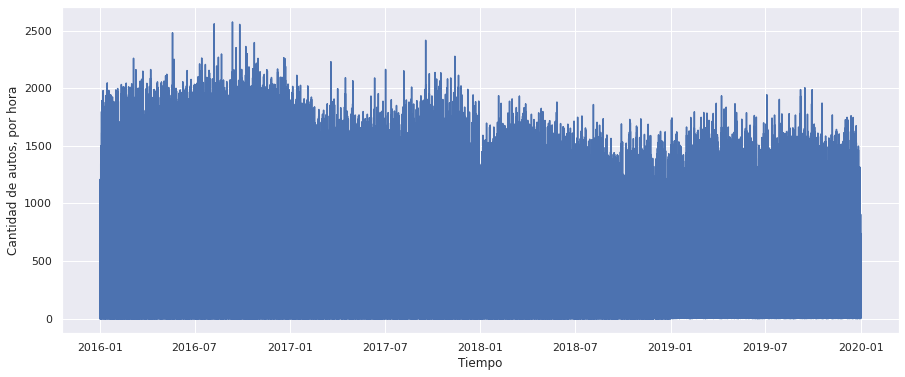

In [15]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

#EDA

In [16]:
data = pd.concat([data_2016,data_2017,data_2018,data_2019])
data

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2016,2016-01-01,0,1,Viernes,Alberdi,Centro,Liviano,NO COBRADO,32
1,2016,2016-01-01,0,1,Viernes,Alberdi,Centro,Liviano,AUPASS,9
2,2016,2016-01-01,1,2,Viernes,Alberdi,Centro,Liviano,NO COBRADO,1
3,2016,2016-01-01,1,2,Viernes,Alberdi,Centro,Liviano,EFECTIVO,4
4,2016,2016-01-01,1,2,Viernes,Alberdi,Centro,Liviano,EXENTO,3
...,...,...,...,...,...,...,...,...,...,...
812148,2019,2019-12-31,23,0,Martes,Salguero,Provincia,Liviano,NO COBRADO,7
812149,2019,2019-12-31,23,0,Martes,Salguero,Provincia,Liviano,TELEPASE,4
812150,2019,2019-12-31,23,0,Martes,Salguero,Provincia,Pesado,NO COBRADO,1
812151,2019,2019-12-31,23,0,Martes,Sarmiento,Provincia,Liviano,NO COBRADO,7


In [17]:
data['fecha'] = pd.to_datetime(data.fecha, yearfirst=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4940149 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   periodo         int64         
 1   fecha           datetime64[ns]
 2   hora_inicio     int64         
 3   hora_fin        int64         
 4   dia             object        
 5   estacion        object        
 6   sentido         object        
 7   tipo_vehiculo   object        
 8   forma_pago      object        
 9   cantidad_pasos  int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 414.6+ MB


In [18]:
data.groupby([data.fecha.dt.year])[['cantidad_pasos']].sum()

,cantidad_pasos
fecha,
2016,125346583
2017,124833490
2018,123093692
2019,126710525


In [19]:
#Funcion que usare a lo largo del EDA
def porcentaje(x):
  total = data.cantidad_pasos.sum()
  return (x.sum()/total)*100


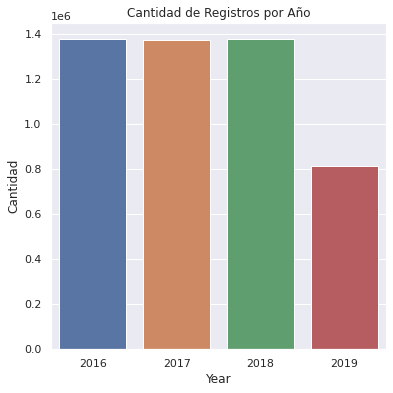

In [20]:
plt.figure(figsize=(6,6))
sns.countplot(x=data.periodo)
plt.title('Cantidad de Registros por Año')
plt.xlabel('Year')
plt.ylabel('Cantidad')
plt.show();

In [21]:
data.groupby(['periodo'])[['cantidad_pasos']].count()

,cantidad_pasos
periodo,
2016,1379443
2017,1372645
2018,1375908
2019,812153


In [22]:
data.groupby(['periodo'])[['cantidad_pasos']].agg(['sum', porcentaje])

cantidad_pasos           
                   sum porcentaje
periodo                          
2016         125346583  25.070104
2017         124833490  24.967482
2018         123093692  24.619512
2019         126710525  25.342901

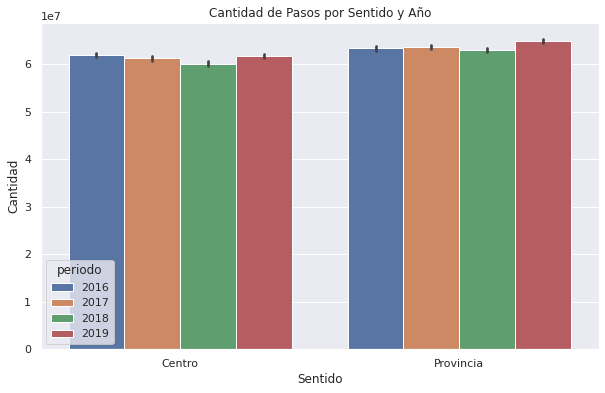

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x=data.sentido, y=data.cantidad_pasos, hue=data.periodo, estimator=np.sum)
plt.title('Cantidad de Pasos por Sentido y Año')
plt.xlabel('Sentido')
plt.ylabel('Cantidad')
plt.show();

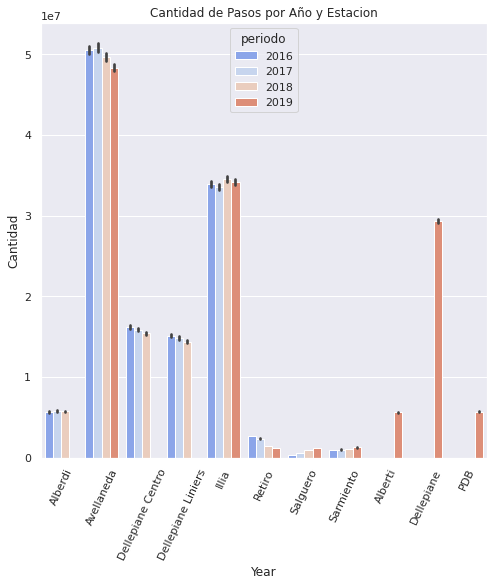

In [24]:
plt.figure(figsize=(8,8))
sns.barplot(x=data.estacion, y= data.cantidad_pasos, estimator=np.sum, hue= data.periodo, palette='coolwarm') 
plt.title('Cantidad de Pasos por Año y Estacion')
plt.xlabel('Year')
plt.ylabel('Cantidad')
plt.xticks(rotation=65)
plt.show();

In [25]:
# Extrayendo el mes de la columna fecha
data['mes'] = data.fecha.dt.month_name()

In [26]:
data.groupby(['mes'])[['cantidad_pasos']].agg(['sum',porcentaje]).sort_values(by=([('cantidad_pasos','sum')]))

cantidad_pasos           
                     sum porcentaje
mes                                
February        36650041   7.330239
January         39466698   7.893588
April           39848868   7.970024
June            40183575   8.036968
May             41884273   8.377118
July            42033731   8.407010
March           42041476   8.408559
September       42446948   8.489656
August          43460660   8.692405
December        43798377   8.759951
November        43874353   8.775146
October         44295290   8.859336

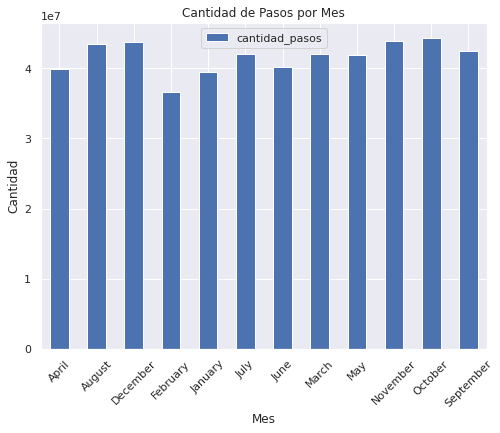

In [27]:
data.groupby(['mes'])[['cantidad_pasos']].sum().plot(kind='bar',figsize=(8,6))
#sns.barplot(x=data.mes, y=data.cantidad_pasos, estimator=sum)
plt.title('Cantidad de Pasos por Mes')
plt.ylabel('Cantidad')
plt.xlabel('Mes')
plt.xticks(rotation=45)
plt.show();

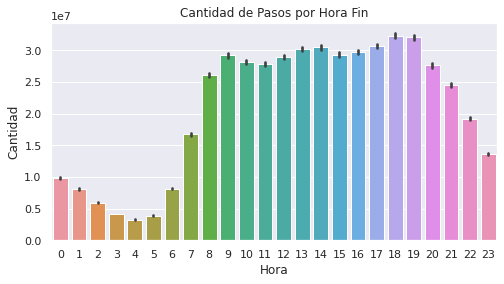

In [28]:
plt.figure(figsize=(8,4))
sns.barplot(x=data.hora_fin, y=data.cantidad_pasos, estimator=np.sum)
plt.title('Cantidad de Pasos por Hora Fin')
plt.ylabel('Cantidad')
plt.xlabel('Hora')
plt.show();

In [29]:
data.forma_pago.value_counts(ascending=False)

EFECTIVO                1473556
TELEPASE                1027861
EXENTO                   633400
INFRACCION               545672
NO COBRADO               493728
AUPASS                   387616
TARJETA DISCAPACIDAD     287788
T. DISCAPACIDAD           76001
MONEDERO                  14519
Otros                         8
Name: forma_pago, dtype: int64

In [30]:
# Unifique criterios para la columna forma de pago
data['forma_pago'] = data.forma_pago.apply(lambda x:'T. DISCAPACIDAD' if (x =='TARJETA DISCAPACIDAD')  else x)
# Unifique criterios para la columna forma de pago
data['forma_pago'] = data.forma_pago.apply(lambda x:'TELEPASE' if (x =='AUPASS')  else x)

In [31]:
data.forma_pago.value_counts(ascending=False)

EFECTIVO           1473556
TELEPASE           1415477
EXENTO              633400
INFRACCION          545672
NO COBRADO          493728
T. DISCAPACIDAD     363789
MONEDERO             14519
Otros                    8
Name: forma_pago, dtype: int64

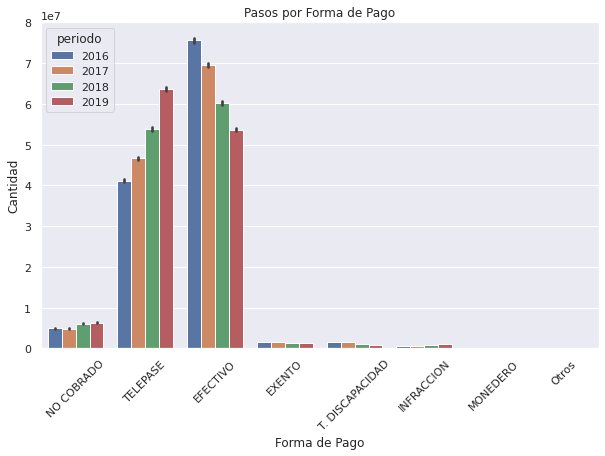

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(x = data.forma_pago, y = data.cantidad_pasos, hue = data.periodo, estimator=np.sum)
plt.title('Pasos por Forma de Pago')
plt.xlabel('Forma de Pago')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show();

In [33]:
data.groupby(['tipo_vehiculo','periodo'])[[ 'cantidad_pasos']].sum()

cantidad_pasos
tipo_vehiculo periodo                
Liviano       2016          114374136
              2017          113674277
              2018          112371359
              2019          112119160
Pesado        2016           10972447
              2017           11159213
              2018           10722333
              2019           14591365

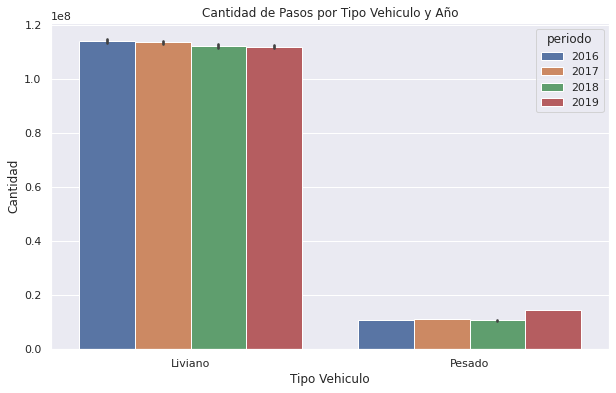

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(x=data.tipo_vehiculo, y=data.cantidad_pasos, hue=data.periodo, estimator=np.sum, )
plt.title('Cantidad de Pasos por Tipo Vehiculo y Año')
plt.xlabel('Tipo Vehiculo')
plt.ylabel('Cantidad')
plt.show();

In [35]:
data.groupby(['tipo_vehiculo'])[['cantidad_pasos']].agg(['sum',porcentaje])

cantidad_pasos           
                         sum porcentaje
tipo_vehiculo                          
Liviano            452538932   90.51063
Pesado              47445358    9.48937

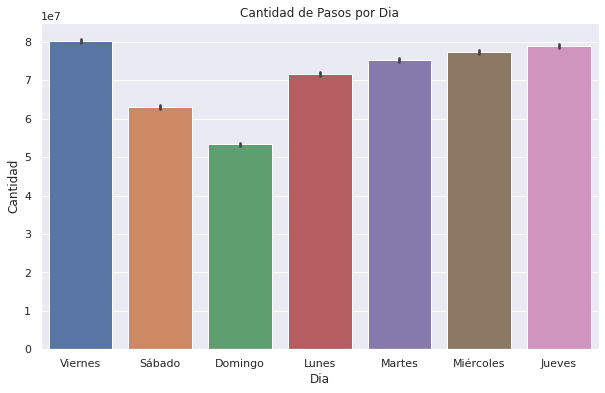

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(x=data.dia, y=data.cantidad_pasos, estimator=np.sum)
plt.title('Cantidad de Pasos por Dia')
plt.xlabel('Dia')
plt.ylabel('Cantidad')
plt.show();

#Concluciones EDA
* Para este Nuevo proyecto se tomaron encuenta los datos del 2016 para analizar si aportan a la prediccion de los modelos que realizamos para Proyecto 3.

*   Apesar de que 2019 posee un numero menor de registros, tiene mayor numero de pasos de vehiculos.
  - 2016:	125.346.583
  - 2017:	124.833.490
  - 2018:	123.093.692
  - 2019:	126.710.525

*  Encontramos que existen dos sentidos hacia los cuales transcurren los vehiculos: Centro y Provincia donde la cantidad total de vehiculos que transcurre es casi igual para cada sentido. Y se comporta de la misma manera cuando se discrimina entre años.

* Al unir los datasets encontramos 11 estaciones diferentes, pero no son las mismas entre años, es decir, que hay años donde existen estaciones que no existen en otros años.
  - Por ejemplo Dellepiane aparece para el año 2019 y no para los años 2017 y 2018.
  -Puede existir un error en la base de datos ya que para 2019 aparece la estacion "alberti" y para los años 20.16, 2017 y 2018 aparece "alberdi".

* Encontramos que el mes con mayor cantidad de pasos de vehiculos es Octubre con 33.236.614 equivalente al 8.871668 % del total de pasos.

* El mes con menor numero de pasos de vehiculos es Febrero con 27.311.268 equivalente al 7.290048 %

* Al analizar las horas en que mas vehiculos reportan vemos que hay un comportamiento a la alza desde las 5:00 hasta las 9:00 donde se estabiliza hasta las 19:00 y alcanza su punto maximo a las 18:00.

* Apartir de las 19:00 se nota una tendencia a la baja aproximadamente hasta las 5:00 donde alcanza el punto mas bajo de flujo de vehiculos a las 4:00.

* Las formas de pagos mas usadas son Telepase y Efecivo.

* La forma de pago Efectivo fue disminuyendo su uso de un año a otro y en cambio la forma de pago Telepase fue aumentando de un año a otro.

* aproximadamente el 91% de los datos corresponde a vehiculos livianos y el resto a vehiculos pesados. Y las cantidades de vehiculos no varia mucho cuando se pasa de un año a otro, esto se cumple para los dos tipos de vehiculos.

* El dia de la semana que reporta mayor cantidad de vehiculos es el Viernes y el menor es el Domingo.



#Componentes de la Serie

- Diaria
- Semanal
- Mensual

**Diaria**

In [37]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1461, 1)


,cantidad_pasos
fecha,
2016-01-01,25602
2016-01-02,36136
2016-01-03,37225
2016-01-04,50312
2016-01-05,49907


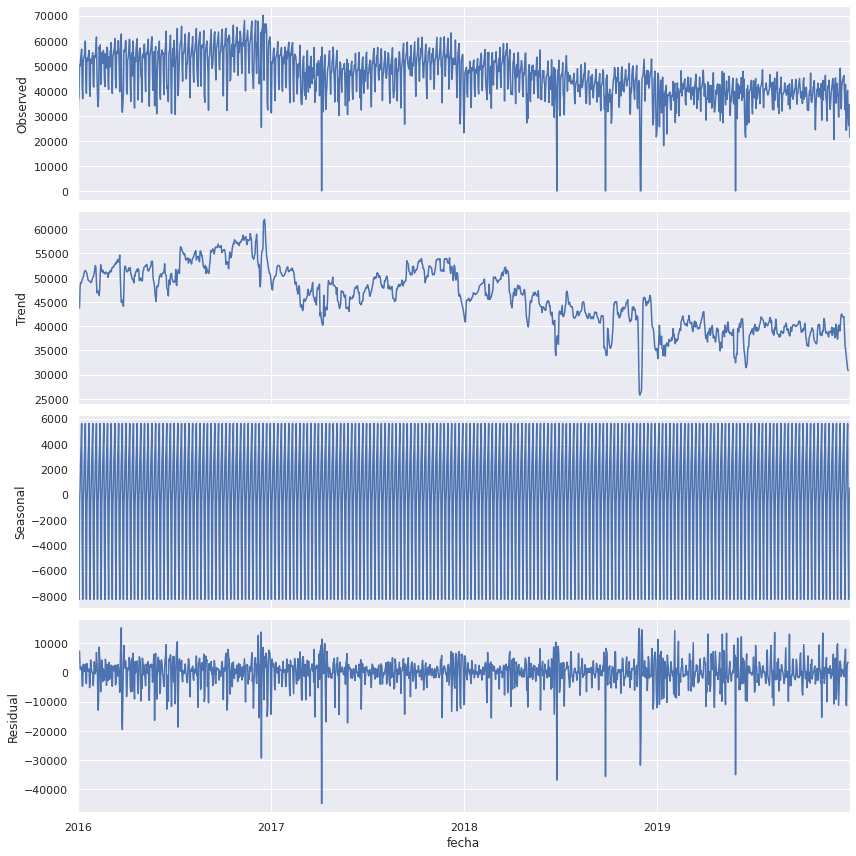

In [38]:
result = seasonal_decompose(diario.cantidad_pasos, model='additive')
plt.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

**Semanal**

In [39]:
semanal = dataset.resample('W',on='fecha').sum()
print('Shape: ', semanal.shape)
semanal.head()

Shape:  (210, 1)


,cantidad_pasos
fecha,
2016-01-03,98963
2016-01-10,342201
2016-01-17,359649
2016-01-24,346217
2016-01-31,348221


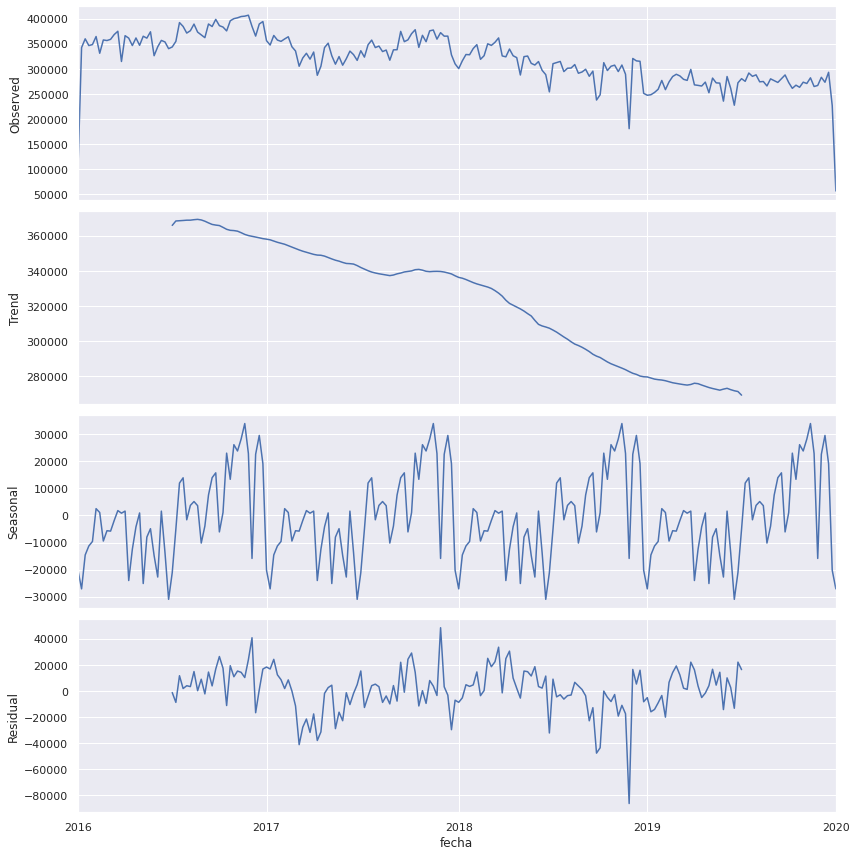

In [40]:
result= seasonal_decompose(semanal.cantidad_pasos, model='additive')
plt.rcParamsDefault['figure.figsize'] = [12,12]
result.plot()
plt.show()

**Mensual**

In [41]:
mensual = dataset.resample('M',on='fecha').sum()
print('Shape: ',mensual.shape)
mensual.head()

Shape:  (48, 1)


,cantidad_pasos
fecha,
2016-01-31,1495251
2016-02-29,1462367
2016-03-31,1590835
2016-04-30,1517590
2016-05-31,1559386


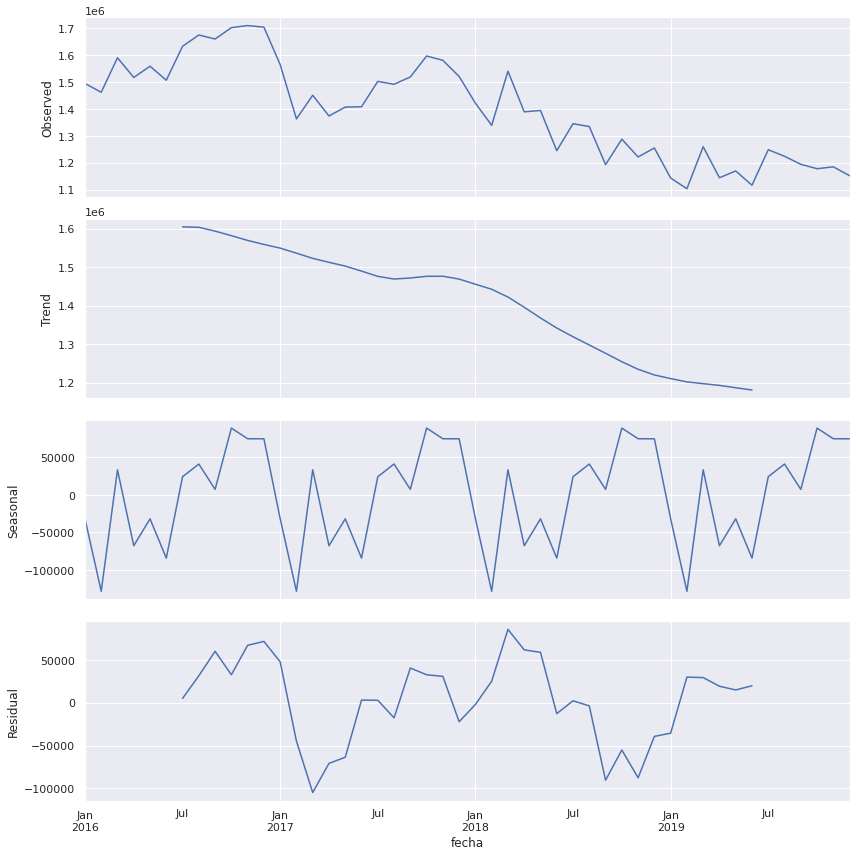

In [42]:
result = seasonal_decompose(mensual.cantidad_pasos, model='additive')
plt.rcParams['figure.figsize']= (12,12)
result.plot()
plt.show()


#Conclusiones de Descomposion de la serie

Vemos como cada una de las graficas de las componentes de la serie se comportan de manera parecida apesar de que la agrupacion de los datos varia.

Por esta razon tome la decision de tomar la descomposion semanal como base para trabajar la serie de tiempo.

1. Si tomo la descomposion diaria debo calcular muchos valores a la hora de predecir que por ende implicaria una mayor probailidad de error al predecir.

2. Su comportamiento es muy parecido al comportamiento general de los datos que se toman diarios.

3. Si tomo los datos diarios se aumentan mucho los datos de entrenamiento por tanto implica mas recursos fisicos y si tomo los datos mensuales tengo muy pocos datos para uqe mi modelo pueda entrenar y capturar el comportamiento general de los datos.

Por lo cual la serie quedo de 158 valores en total.

#Eliminando atipicos

Inicialmente quitaremos los valores que corresponden a la primera fecha y a la ultima:

- Porque no sabemos en que dia empezo a contar esa semana.
- Como sabemos los primeros de enero viaja muy poca gente.







In [43]:
semanal.reset_index(inplace=True)

In [44]:
semanal

,fecha,cantidad_pasos
0,2016-01-03,98963
1,2016-01-10,342201
2,2016-01-17,359649
3,2016-01-24,346217
4,2016-01-31,348221
...,...,...
205,2019-12-08,282891
206,2019-12-15,272960
207,2019-12-22,292881
208,2019-12-29,226390


In [45]:
semanal.cantidad_pasos[semanal.cantidad_pasos < 200000]

0       98963
152    180328
209     55970
Name: cantidad_pasos, dtype: int64

In [46]:
semanal.cantidad_pasos[semanal.cantidad_pasos < 200000] = np.nan
print('Nulos:', semanal.cantidad_pasos.isnull().sum())
semanal = semanal.interpolate()
print('Nulos:', semanal.cantidad_pasos.isnull().sum())


Nulos: 3
Nulos: 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
semanal.cantidad_pasos[semanal.cantidad_pasos < 200000]

Series([], Name: cantidad_pasos, dtype: float64)

In [48]:
semanal[semanal.cantidad_pasos.isna()]

,fecha,cantidad_pasos
0,2016-01-03,NaN


In [49]:
semanal.loc[0]

fecha             2016-01-03 00:00:00
cantidad_pasos                    NaN
Name: 0, dtype: object

In [50]:
print(semanal.shape)
semanal.drop(index=[0], inplace=True)
print(semanal.shape)

(210, 2)
(209, 2)


In [51]:
semanal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 1 to 209
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fecha           209 non-null    datetime64[ns]
 1   cantidad_pasos  209 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.9 KB


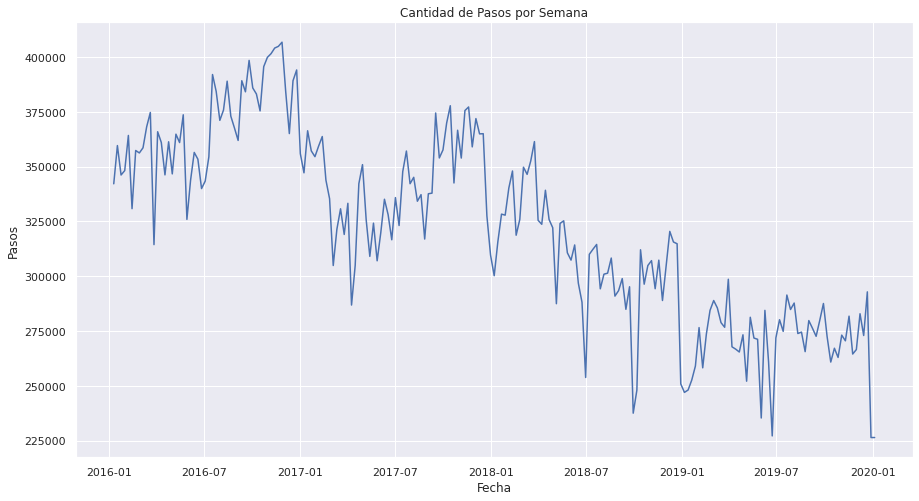

In [52]:
plt.figure(figsize=(15,8))
plt.plot(semanal.fecha, semanal.cantidad_pasos)
plt.title('Cantidad de Pasos por Semana')
plt.xlabel('Fecha')
plt.ylabel('Pasos')
plt.show();

# Concluciones Valores Atipicos

Al ver las graficas y al analizar los valores que las graficas de los valores observados, tome la decision de que serian valores atipicos aquellos que en la columna cantidad_pasos fueran menor de 200.000 (cantidad_pasos < 200.000).
Se encontraron 3 valores atipicos en la serie que tenian como index los siguientes: 0, 100, 157.

como los index 0 y 157 corresponden al primer y ultimo valor de la serie se tomo la decision de eliminarlos, ya que de esta manera no se altera la serie y no se rompe la relacion con el tiempo que debe tener la serie.

Para imputar el valor correspondente al index 100, se uso la funicon interpolate(). Donde inicialmente tenia el valor de 180328 y luego de imputar quedo con  304708.




#Autocorrelacion

In [53]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

nlags =  semanal.shape[0]
autocorr = acf(semanal.cantidad_pasos, nlags = nlags)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


In [54]:
autocorr.shape

(209,)

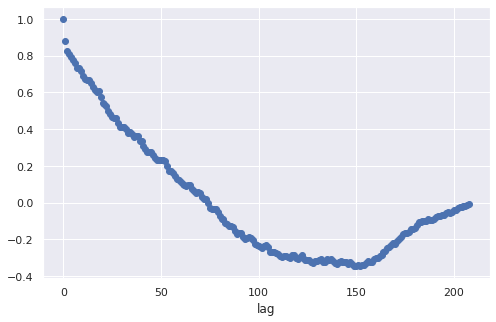

In [55]:
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags), autocorr)
plt.xlabel('lag');

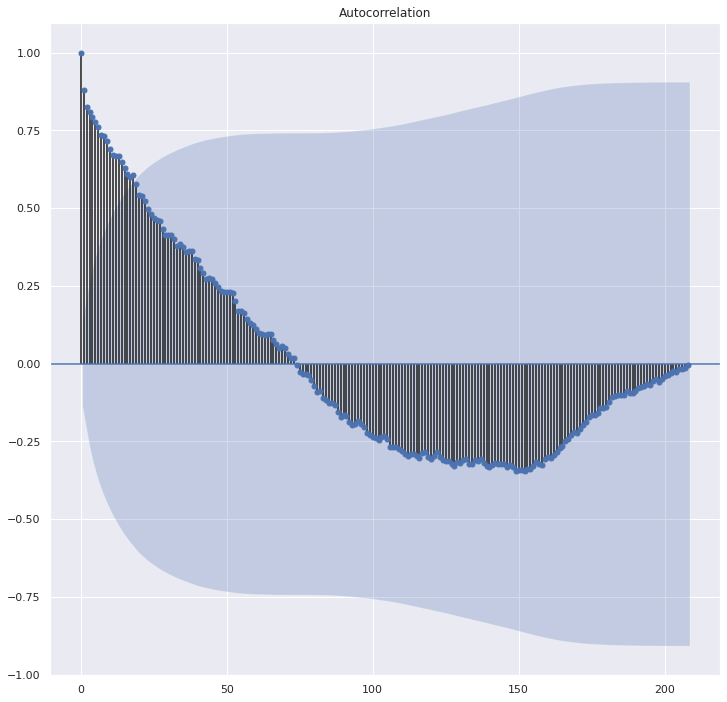

In [56]:
#plt.figure(figsize=(15,8))
plot_acf(semanal.cantidad_pasos, lags = semanal.shape[0]-1)
plt.show();

# Concluciones Autorelacion

Se usaron todos los 156 datos de la serie para hallar la autocorrelacion encontramos que el valor optimo para el **loop_back = 16**.

Por tanto nuestra matriz de datos quedara con 16 columnas.

#Matriz de Datos

In [57]:
senial = semanal.cantidad_pasos
senial.head()
senial.shape

(209,)

In [58]:
look_back = 16

In [59]:
N = senial.shape[0]
X = np.zeros((N - look_back,look_back))
y = np.zeros(N - look_back)
print(X.shape, y.shape)

(193, 16) (193,)


In [60]:
senial


1      342201.0
2      359649.0
3      346217.0
4      348221.0
5      364271.0
         ...   
205    282891.0
206    272960.0
207    292881.0
208    226390.0
209    226390.0
Name: cantidad_pasos, Length: 209, dtype: float64

In [61]:
 for i in range(X.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]
    

In [62]:
N_test = 12 #cantidad de puntos que vamos a usar para evaluar
N_train = (N - (N_test))- look_back # cantidad de instancias que vamos a usar para entrenar. 
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(181, 16) (181,)
(12, 16) (12,)


#Matriz Train y Test

- X_train = (128,16)
- y_train = (128)
- X_test = (12,16)
- y_test = (12)

#Modelado

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

Tendremos 4 modelos, para los cuales se usara la metrica de RMSE para determinar cual es el mejor modelo. Los modelos a usar seran los siguientes:

- Modelo Benchmark: en el cual usaremos la semana inmediatamente anterior para asignarla como prediccion.

- Modelo RandomForest.

- Modelo SVM: Usaremos el SVR que es la variante paara regresiones.

- Modelo XGboost.

## BenchMarck

In [64]:
bench = semanal.copy()

In [65]:
bench['benchmark'] = semanal.cantidad_pasos.shift(periods=1)

In [66]:
bench.isnull().sum()

fecha             0
cantidad_pasos    0
benchmark         1
dtype: int64

In [67]:
bench.dropna(inplace=True)
bench.isnull().sum()

fecha             0
cantidad_pasos    0
benchmark         0
dtype: int64

In [68]:
bench.shape

(208, 3)

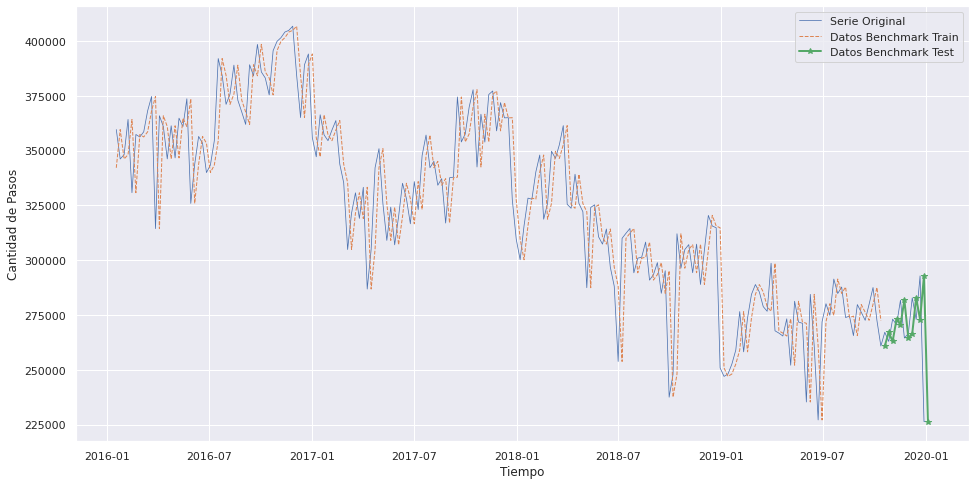

In [69]:
plt.figure(figsize=(16,8))
plt.plot(bench.fecha, bench.cantidad_pasos, lw = 0.75, label = 'Serie Original')
plt.plot(bench.fecha[:196], bench.benchmark[:196],'--', lw = 1, label = 'Datos Benchmark Train')
plt.plot(bench.fecha[-12:], bench.benchmark[-12:],'-*', lw = 2, label = 'Datos Benchmark Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Pasos')
plt.show()

In [70]:
print("RMSE Train: ", np.sqrt(mean_squared_error(y_pred= bench.benchmark[:196], y_true=bench.cantidad_pasos[:196])))
print("RMSE Test: ", np.sqrt(mean_squared_error(y_pred= bench.benchmark[-12:], y_true=bench.cantidad_pasos[-12:])))



RMSE Train:  19759.74448764044
RMSE Test:  21948.685169427954


## Concluciones Benchmark

* Para el modleo benckmark se tomo que para las predicciones asignarias el valor que tuvo la variable cantidad de pasos de la semana anterior.

* Se elimino el primer datos de la serie ya que para las predicciones tomaba el valor de nulo.

* La metrica usada fue el RMSE, Y se obtuvo un valor de:

  - RMSE Train:  19842.39839695183
  - RMSE Test:  22204.535604616158

##RandomForestRegressor

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [72]:
"""
grid = {
    'n_estimators':[50,75,100,150,200],
    'max_depth':np.arange(1,10),
    'max_features':['auto','sqrt'],
    'min_samples_leaf':[1,2,3],
    'bootstrap':[True,False]
}

#tscv = TimeSeriesSplit(n_splits=12)
#print("TimeSeriesSplit: ", tscv)


rf = RandomForestRegressor(random_state=42, n_jobs =-1)
model_grid = GridSearchCV(rf, param_grid=grid, cv=3, scoring='neg_mean_squared_error').fit(X_train,y_train)
print(model_grid.best_params_)
print(model_grid.best_score_)

cv_r=pd.DataFrame(model_grid.cv_results_)
cv_r['mean_test_score']= np.sqrt(cv_r['mean_test_score'] * -1)
#cv_r['split11_test_score']= np.sqrt(cv_r['split9_test_score'] * -1)
cv_r.mean_test_score.min()
"""

'\ngrid = {\n    \'n_estimators\':[50,75,100,150,200],\n    \'max_depth\':np.arange(1,10),\n    \'max_features\':[\'auto\',\'sqrt\'],\n    \'min_samples_leaf\':[1,2,3],\n    \'bootstrap\':[True,False]\n}\n\n#tscv = TimeSeriesSplit(n_splits=12)\n#print("TimeSeriesSplit: ", tscv)\n\n\nrf = RandomForestRegressor(random_state=42, n_jobs =-1)\nmodel_grid = GridSearchCV(rf, param_grid=grid, cv=3, scoring=\'neg_mean_squared_error\').fit(X_train,y_train)\nprint(model_grid.best_params_)\nprint(model_grid.best_score_)\n\ncv_r=pd.DataFrame(model_grid.cv_results_)\ncv_r[\'mean_test_score\']= np.sqrt(cv_r[\'mean_test_score\'] * -1)\n#cv_r[\'split11_test_score\']= np.sqrt(cv_r[\'split9_test_score\'] * -1)\ncv_r.mean_test_score.min()\n'

Metrica usada fue el negative mean squared error, pero se convirtio a RMSE:

- Mejores parametros son : {'max_depth': 4, 'n_estimators': 100}
- best_score = 21662.079381505588

In [73]:
rf_best = RandomForestRegressor(n_estimators=100 ,max_depth =4, n_jobs =-1,random_state=42).fit(X_train,y_train)

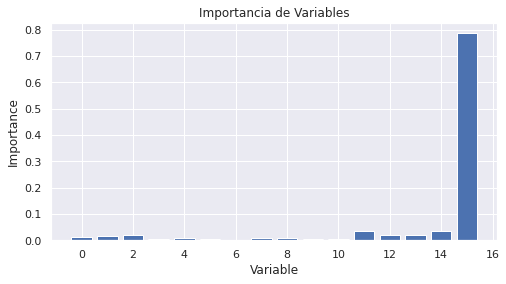

In [74]:
plt.figure(figsize = (8,4))
plt.bar(np.arange(rf_best.feature_importances_.size),rf_best.feature_importances_)
plt.title('Importancia de Variables')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.show();

In [75]:
rf_best.feature_importances_

array([0.01342103, 0.01783498, 0.01993543, 0.00629331, 0.00810818,
       0.00320614, 0.00288003, 0.0096828 , 0.00884605, 0.0052282 ,
       0.00471712, 0.03465257, 0.02012574, 0.02196847, 0.03653779,
       0.78656216])

In [76]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

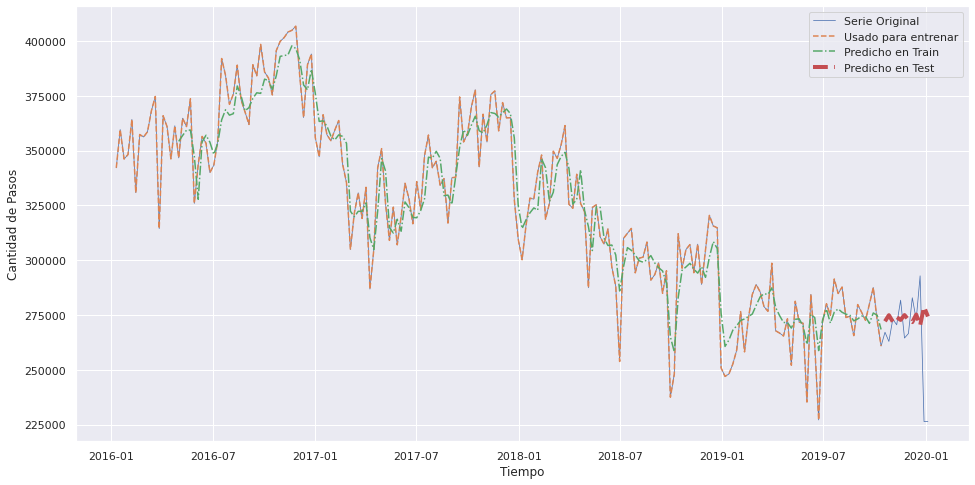

In [77]:
plt.figure(figsize=(16,8))
plt.plot(semanal.fecha[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(semanal.fecha[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(semanal.fecha[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(semanal.fecha[N_train+look_back: length_total], y_test_pred,'--', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Pasos')
plt.show()

In [78]:
print("RMSE Train: ", np.sqrt(mean_squared_error(y_pred=y_train_pred, y_true=y_train)))
print("RMSE Test: ", np.sqrt(mean_squared_error(y_pred=y_test_pred, y_true=y_test)))

RMSE Train:  11836.649476986078
RMSE Test:  22545.348273031414


# Conlcuciones RandomForest

Al aplicar GridSearchCV con una validacion de 12 splits, nos arrojo que el mejor modelo tenia los siguientes parametros:

-  max_depth = 4
- n_estimator = 100

Al apicar dichos parametros tanto para los datos de train y test se obtuvieron estos resultados para RMSE:

- RMSE Train:  10801.06801012566
- RMSE Test:  17955.426769196045

##Support Vector Machine

In [79]:
%%time
from sklearn.svm import  SVC, SVR
svm = SVR(kernel='poly', degree=5, C= 0.9)

model_1= svm.fit(X_train,y_train)

pred_1_train = model_1.predict(X_train) 
pred_1_test = model_1.predict(X_test)


CPU times: user 1min 39s, sys: 66.4 ms, total: 1min 39s
Wall time: 1min 38s


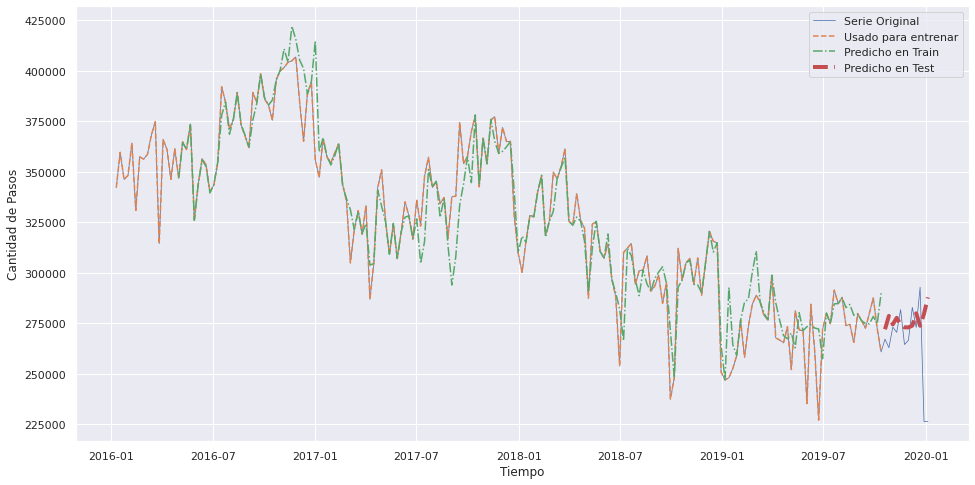

In [80]:
plt.figure(figsize=(16,8))
plt.plot(semanal.fecha[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(semanal.fecha[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(semanal.fecha[look_back: look_back + N_train], pred_1_train,'-.',label = 'Predicho en Train')
plt.plot(semanal.fecha[N_train+look_back: length_total], pred_1_test,'--', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Pasos')
plt.show()

In [81]:
print("RMSE Train: ", np.sqrt(mean_squared_error(y_pred=pred_1_train, y_true=y_train)))
print("RMSE Test: ",np.sqrt(mean_squared_error(y_pred=pred_1_test, y_true=y_test)))

RMSE Train:  13228.632338497468
RMSE Test:  25180.87177959


## Conclusiones SVM
Al ejecutar este modelo con un kernel = 'Poly' y un degree = 5, obtuve los siguientes valores:

- RMSE Train:  7604.728112448556
- RMSE Test:  22897.230521222744

**XGBRegressor**

In [82]:
from xgboost import XGBRegressor

'''
tscv = TimeSeriesSplit(n_splits=12)
print("TimeSeriesSplit: ", tscv)

grid = {
    'n_estimators':[50,75,100,150,200],
    'max_depth':np.arange(1,20),
    'learning_rate': [0.01,0.02,0.03,0.05,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2],
    'nthread':[4], #when use hyperthread, xgboost may become slower
    'objective':['reg:squarederror']
}

xgb = XGBRegressor(n_jobs=-1)
model_xgb=GridSearchCV(xgb, param_grid=grid, cv=tscv).fit(X_train,y_train)
'''



'\ntscv = TimeSeriesSplit(n_splits=12)\nprint("TimeSeriesSplit: ", tscv)\n\ngrid = {\n    \'n_estimators\':[50,75,100,150,200],\n    \'max_depth\':np.arange(1,20),\n    \'learning_rate\': [0.01,0.02,0.03,0.05,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2],\n    \'nthread\':[4], #when use hyperthread, xgboost may become slower\n    \'objective\':[\'reg:squarederror\']\n}\n\nxgb = XGBRegressor(n_jobs=-1)\nmodel_xgb=GridSearchCV(xgb, param_grid=grid, cv=tscv).fit(X_train,y_train)\n'

In [83]:
#print(model_xgb.best_params_)
#print(model_xgb.best_score_)

In [84]:
#cv_r2=pd.DataFrame(model_xgb.cv_results_)

In [85]:
#cv_r2['mean_test_score']= np.sqrt(cv_r2['mean_test_score'] * -1)

In [86]:
#cv_r2['split9_test_score']= np.sqrt(cv_r2['split9_test_score'] * -1)

In [87]:
#cv_r2.split9_test_score.min()

In [88]:
#cv_r2[cv_r2.split9_test_score==cv_r2.split9_test_score.min()]

In [89]:
#cv_r2.mean_test_score.min()

In [90]:
#cv_r2[cv_r2.mean_test_score==cv_r2.mean_test_score.min()]

In [91]:
xgb = XGBRegressor( max_depth=4, n_estimators=75, learning_rate=0.17, objective='reg:squarederror', nthread=4, n_jobs=-1,).fit(X_train,y_train)

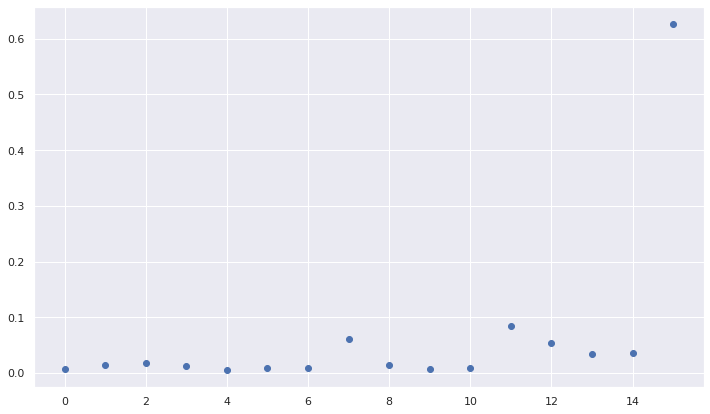

In [92]:
pred_2_train = xgb.predict(X_train) 

pred_2_test = xgb.predict(X_test)


plt.figure(figsize = (12,7))
plt.scatter(np.arange(xgb.feature_importances_.size),xgb.feature_importances_)
plt.show()

In [93]:
xgb.feature_importances_

array([0.0073685 , 0.01340932, 0.01766307, 0.01231911, 0.0052974 ,
       0.00839523, 0.00966939, 0.06063801, 0.01435322, 0.00782504,
       0.00952736, 0.08392589, 0.05375363, 0.03394194, 0.03564994,
       0.62626296], dtype=float32)

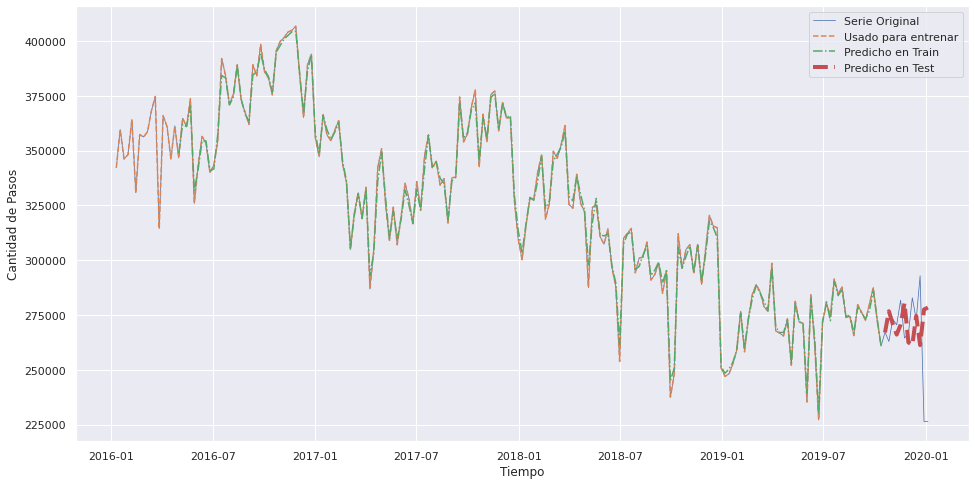

In [94]:
plt.figure(figsize=(16,8))
plt.plot(semanal.fecha[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(semanal.fecha[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(semanal.fecha[look_back: look_back + N_train], pred_2_train,'-.',label = 'Predicho en Train')
plt.plot(semanal.fecha[N_train+look_back: length_total], pred_2_test,'--', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Pasos')
plt.show()

In [95]:
print("RMSE Train: ", np.sqrt(mean_squared_error(y_pred=pred_2_train, y_true=y_train)))
print("RMSE Test: ",np.sqrt(mean_squared_error(y_pred=pred_2_test, y_true=y_test)))

RMSE Train:  2568.2928579382515
RMSE Test:  24832.93099473778


## Conclusiones XGboost

Al correr un GridSearch encontro que los mejores parametros fueron:

- max_depth=4
- n_estimators=75 
- learning_rate=0.17

De lo cual al correr el modelo con dichos parametros se encontro que obtuvimos unos valores de metrica de :

- RMSE Train:  1091.967702495397
- RMSE Test:  18436.499080933092

# Conclusiones de los MODELOS

In [96]:
t_modelos = {
    'Modelos': ['Benchmark','RandomForest','SVR', 'XGBoost'],
    'RMSE Train': [19842.39839695183, 10801.06801012566, 7604.728112448556, 1091.967702495397],
    'RMSE Test': [22204.535604616158, 17955.426769196045, 22897.230521222744, 18436.499080933092]
}

t_modelos = pd.DataFrame(t_modelos)
t_modelos

,Modelos,RMSE Train,RMSE Test
0,Benchmark,19842.398397,22204.535605
1,RandomForest,10801.068010,17955.426769
2,SVR,7604.728112,22897.230521
3,XGBoost,1091.967702,18436.499081


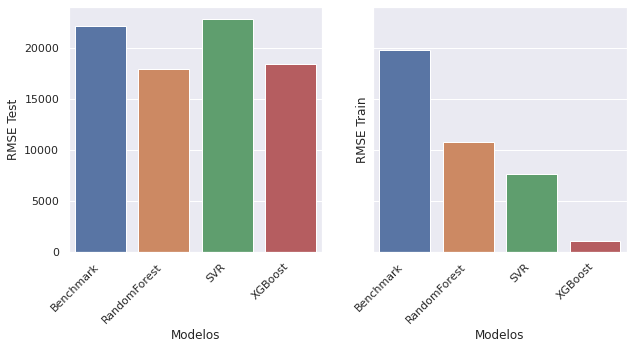

In [97]:
fig, axs = plt.subplots(1,2,figsize= (10,5), sharey= True,)
sns.barplot(data=t_modelos, x= 'Modelos', y='RMSE Test', ax= axs[0])
sns.barplot(data=t_modelos, x= 'Modelos', y='RMSE Train', ax= axs[1]);
fig.autofmt_xdate(rotation=45)

Encontramos que el mejor Modelo en Train es:

- XgBoost

EL mejor modelo en Test:

- RandomForest

Nota: Teniendo en cuenta que en Test estan muy cerca donde:

- Randomforest: 
  - Train 10801.068010 
  - Test	17955.426769

- XGboost:
  - Train 1091.967702 
  - Test	18436.499081	


Podemos ver que en train el Xgboost gana notablemente y en test el randomforest gana por muy poca diferencia, por ello probare los dos modelos con los datso de validacion. Cuyos datos son el primer trimestre del año 2020.

# Validacion Con Datos 2020

Cargamos los datos del 2020 y luego los concatenaremos con los datos del 2019 para grupar por semanas.

Teniendo en cuenta que nuesta anterior aurocorrelacion  nos dio que son necesarias 16 semanas para predecir un valor, necesitaremos las ultimas 16 semanas de 2019 para asi poder predecir la primera semana del 2020.

In [98]:
data_2020 = pd.read_csv('/content/drive/MyDrive/Data Science Acamica/Sprint 3/Proyecto 3 - Series de Tiempo/flujo-vehicular-2020.csv', sep =',')
data_2020.head()

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Centro,24.0
1,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80.0
2,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1.0
3,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1.0
4,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1.0


In [99]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533743 entries, 0 to 2533742
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   periodo         float64
 1   fecha           object 
 2   mes             object 
 3   dia             object 
 4   dia_fecha       float64
 5   hora_inicio     float64
 6   hora_fin        float64
 7   estacion        object 
 8   tipo_vehiculo   object 
 9   forma_pago      object 
 10  observacion     object 
 11  sentido         object 
 12  cantidad_pasos  float64
dtypes: float64(5), object(8)
memory usage: 251.3+ MB


Organizamos dataset de 2020

In [100]:
df_2020 = data_2020.copy()
mask = np.logical_and(df_2020.estacion=='ILLIA', (df_2020.forma_pago == 'Efectivo'))
df_2020 = df_2020[mask]
df_2020.drop(columns = ['hora_inicio','periodo', 'estacion', 'mes', 'dia', 'dia_fecha', 'tipo_vehiculo', 'observacion', 'forma_pago', 'sentido'], inplace = True)
df_2020['fecha2'] = pd.to_datetime(df_2020.fecha) + pd.to_timedelta(df_2020.hora_fin, unit = 'h')
df_2020.drop(columns = ['hora_fin','fecha'], inplace = True)
df_2020.rename(columns = {'fecha2':'fecha'}, inplace = True) 
df_2020.sort_values('fecha', inplace = True)
df_2020.reset_index(drop=True, inplace = True)
df_2020

,cantidad_pasos,fecha
0,7.0,2020-01-01 00:00:00
1,423.0,2020-01-01 00:00:00
2,467.0,2020-01-01 00:00:00
3,6.0,2020-01-01 00:00:00
4,1.0,2020-01-01 00:00:00
...,...,...
52369,222.0,2020-12-31 20:00:00
52370,106.0,2020-12-31 21:00:00
52371,5.0,2020-12-31 21:00:00
52372,1.0,2020-12-31 21:00:00


Organizamos el dataset de 2019 para poder trabajar en el.

In [101]:
df_2019 = data_2019.copy()
mask = np.logical_and(df_2019.estacion=='Illia', (df_2019.forma_pago == 'EFECTIVO'))
df_2019 = df_2019[mask]
df_2019.drop(columns = ['hora_inicio','periodo', 'estacion', 'dia', 'tipo_vehiculo', 'forma_pago', 'sentido'], inplace = True)
df_2019['fecha2'] = pd.to_datetime(df_2019.fecha) + pd.to_timedelta(df_2019.hora_fin, unit = 'h')
df_2019.drop(columns = ['hora_fin','fecha'], inplace = True)
df_2019.rename(columns = {'fecha2':'fecha'}, inplace = True) 
df_2019.sort_values('fecha', inplace = True)
df_2019.reset_index(drop=True, inplace = True)
df_2019

,cantidad_pasos,fecha
0,644,2019-01-01 00:00:00
1,630,2019-01-01 00:00:00
2,9,2019-01-01 00:00:00
3,3,2019-01-01 00:00:00
4,537,2019-01-01 02:00:00
...,...,...
34638,2,2019-12-31 22:00:00
34639,556,2019-12-31 22:00:00
34640,1,2019-12-31 22:00:00
34641,214,2019-12-31 23:00:00


In [102]:
df_2019_2020 = pd.concat([df_2019, df_2020])
df_2019_2020.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 87017 entries, 0 to 52373
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   cantidad_pasos  87017 non-null  float64       
 1   fecha           87017 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.0 MB


In [103]:
df_2019_2020.shape

(87017, 2)

In [104]:
df_2019_2020.sort_values('fecha', ignore_index=True, inplace = True)
df_2019_2020

,cantidad_pasos,fecha
0,644.0,2019-01-01 00:00:00
1,630.0,2019-01-01 00:00:00
2,9.0,2019-01-01 00:00:00
3,3.0,2019-01-01 00:00:00
4,537.0,2019-01-01 02:00:00
...,...,...
87012,222.0,2020-12-31 20:00:00
87013,1.0,2020-12-31 21:00:00
87014,106.0,2020-12-31 21:00:00
87015,5.0,2020-12-31 21:00:00


In [105]:
semanal_2019_2020 = df_2019_2020.resample("W",on='fecha').sum()
semanal_2019_2020

,cantidad_pasos
fecha,
2019-01-06,224395.0
2019-01-13,248077.0
2019-01-20,252617.0
2019-01-27,259019.0
2019-02-03,276568.0
...,...
2020-12-06,68580.0
2020-12-13,65435.0
2020-12-20,73578.0


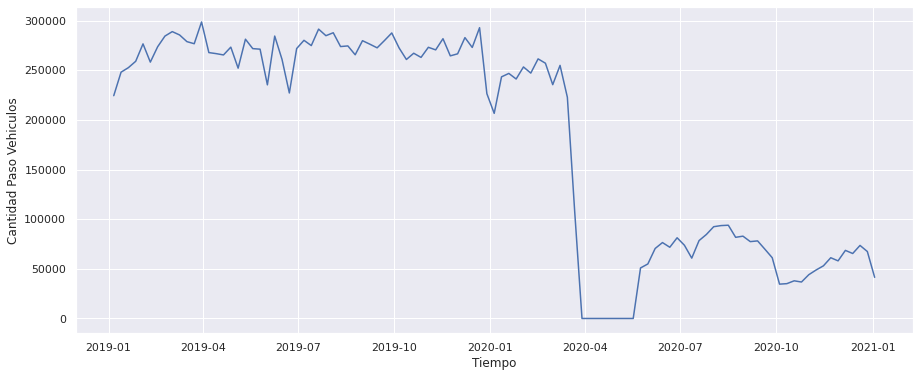

In [106]:
plt.figure(figsize = (15,6))
plt.plot(semanal_2019_2020.index, semanal_2019_2020.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad Paso Vehiculos')
plt.show()

# 2020

Inicialmente podemos atribuir esa caida tan drastica en el flujo de vehiculos a la pandemia. Recordando que para esa epoca casi todos los paises estaban en cierre total, por ellos podemos ver que llego a 0 el flujo de vehiculos y6 se mantuvo por un tiempo.

**NOTA:** Pro ellos solo analizaremos y trabajaremos los datos sobre los cuales hay flujo de vehiculos.

## Datos de Validacion

Sacamos las 12 semanas que vamos a validar, que corresponden al primer trimestre del 2020.  se escogio la fecha del 23 de marzo porque apartir de empeiza el intervalo de valor que estan en 0 para el paso de vehiculos.

In [107]:
semanal_2019_2020[semanal_2019_2020['cantidad_pasos'] == 0]

,cantidad_pasos
fecha,
2020-03-29,0.0
2020-04-05,0.0
2020-04-12,0.0
2020-04-19,0.0
2020-04-26,0.0
2020-05-03,0.0
2020-05-10,0.0


In [108]:
start_date = '2020-01-01'
end_date = '2020-03-23'

y_validacion = semanal_2019_2020[
  (semanal_2019_2020.index >= start_date) & 
  (semanal_2019_2020.index <= end_date)
].values
y_validacion.shape

(12, 1)

Aqui encontramos la semana apartir de la cual debemos empezar armar la matriz de validacion.

In [109]:
semanal_2019_2020[semanal_2019_2020.index < start_date][-16:]

,cantidad_pasos
fecha,
2019-09-15,272592.0
2019-09-22,279927.0
2019-09-29,287568.0
2019-10-06,272483.0
2019-10-13,260840.0
2019-10-20,267147.0
2019-10-27,262950.0
2019-11-03,273129.0
2019-11-10,270536.0


In [110]:
start_date = '2019-09-15'
end_date = '2020-03-23'

datos_validacion = semanal_2019_2020[
  (semanal_2019_2020.index >= start_date) & 
  (semanal_2019_2020.index <= end_date)
].values
datos_validacion.shape

(28, 1)

In [111]:
datos_validacion = pd.DataFrame(datos_validacion)
datos_validacion.columns = ['cantidad_pasos']
datos_validacion

,cantidad_pasos
0,272592.0
1,279927.0
2,287568.0
3,272483.0
4,260840.0
5,267147.0
6,262950.0
7,273129.0
8,270536.0
9,281790.0


## Creamos la matriz de 0 donde guardaremos los datos de la amtriz de validacion

In [112]:
senial_validacion = datos_validacion.cantidad_pasos
X_validacion = np.zeros((y_validacion.shape[0],16))
X_validacion.shape

(12, 16)

## Llenaremos los valores de la matriz de validacion que aun estan en 0.

In [113]:
look_back = 16
for i in range(12):
  X_validacion[i,:] = senial_validacion.iloc[i:i+look_back]  

In [114]:
X_validacion.shape

(12, 16)

In [115]:
X_validacion

array([[272592., 279927., 287568., 272483., 260840., 267147., 262950.,
        273129., 270536., 281790., 264500., 266555., 282891., 272960.,
        292881., 226390.],
       [279927., 287568., 272483., 260840., 267147., 262950., 273129.,
        270536., 281790., 264500., 266555., 282891., 272960., 292881.,
        226390., 206593.],
       [287568., 272483., 260840., 267147., 262950., 273129., 270536.,
        281790., 264500., 266555., 282891., 272960., 292881., 226390.,
        206593., 243359.],
       [272483., 260840., 267147., 262950., 273129., 270536., 281790.,
        264500., 266555., 282891., 272960., 292881., 226390., 206593.,
        243359., 246818.],
       [260840., 267147., 262950., 273129., 270536., 281790., 264500.,
        266555., 282891., 272960., 292881., 226390., 206593., 243359.,
        246818., 241192.],
       [267147., 262950., 273129., 270536., 281790., 264500., 266555.,
        282891., 272960., 292881., 226390., 206593., 243359., 246818.,
        24119

# Evaluamos los modelos con los datos de Validacion


In [116]:
start_date = '2019-09-15'
end_date = '2020-03-23'

grafica_2019_2020 = semanal_2019_2020[
  (semanal_2019_2020.index >= start_date) & 
  (semanal_2019_2020.index <= end_date)
]
grafica_2019_2020.iloc[-12:,:].index

DatetimeIndex(['2020-01-05', '2020-01-12', '2020-01-19', '2020-01-26',
               '2020-02-02', '2020-02-09', '2020-02-16', '2020-02-23',
               '2020-03-01', '2020-03-08', '2020-03-15', '2020-03-22'],
              dtype='datetime64[ns]', name='fecha', freq='W-SUN')

Este ultimo slice que realizamos es para grafiar los datos predichos para los datos de validacion.

## RandomForest

In [117]:
y_pred_val = rf_best.predict(X_validacion)
print('RMSE Validacion: ',np.sqrt(mean_squared_error(y_validacion, y_pred_val)))

RMSE Validacion:  55884.43779422973


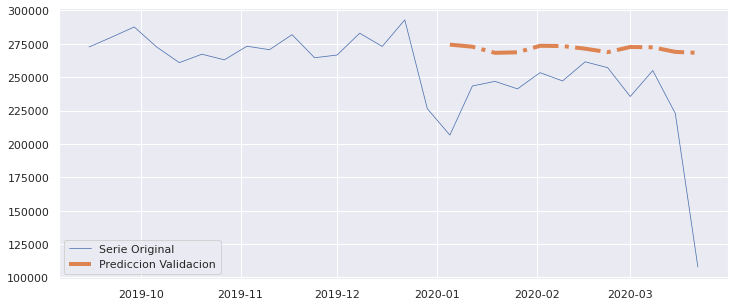

In [118]:
plt.figure(figsize=(12,5))
plt.plot(grafica_2019_2020.index, grafica_2019_2020.cantidad_pasos,lw = 0.75, label = 'Serie Original')
plt.plot(grafica_2019_2020.iloc[-12:,:].index, y_pred_val,'-.', lw = 4, label = 'Prediccion Validacion')
plt.legend()
plt.show()


## Xgboost

In [119]:
y_pred_val_xgb = xgb.predict(X_validacion)
print('RMSE Validacion: ',np.sqrt(mean_squared_error(y_validacion, y_pred_val_xgb)))

RMSE Validacion:  54679.84221966966


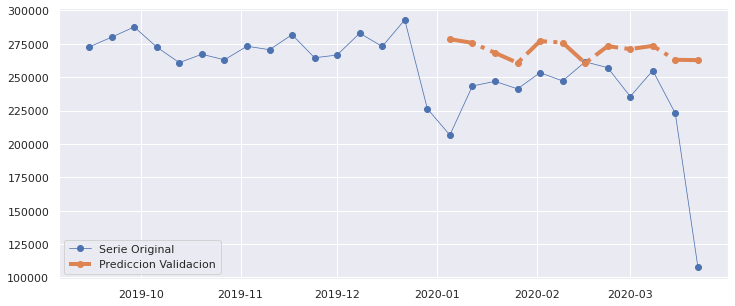

In [120]:
plt.figure(figsize=(12,5))
plt.plot(grafica_2019_2020.index, grafica_2019_2020.cantidad_pasos,lw = 0.75,marker='o', label = 'Serie Original')
plt.plot(grafica_2019_2020.iloc[-12:,:].index, y_pred_val_xgb,'-.', lw = 4, marker='o',label = 'Prediccion Validacion')
plt.legend()
plt.show()

## Conclusiones VALIDACION MODELOS

Podemos ver como los dos modelos tienden a predecir por encima de los datos reales y una de las razones puede ser que los datos a medida que pasan los años van tendiendo a la baja.

tal vez se obtuvo un valor de RMSE mas alta la validacion que el test, ya que la validacion perdio un secuencia en el tiempo al que el test nunca se uso para entenar y luego predecir los datos de validacion.

la mayoria de los modelos tendieron al sobreajuste, ya que en el train se comportaron muy bien pero en el test y en la validacion no lo hicieron tan bien.


Luego de evaluar los dos mejores modelos que tuve para los datos de entrenamiento obtuve:

- Randomforest: RMSE 56678.69452636382
- XGboost: RMSE 56986.801165980185

Por tanto el modelo que mejores resultados me dio fue el **RandomForest**
- Train: 10801.068010
- Test: 17955.426769
- Validacion: 56678.69452636382 

# CONCLUSIONES FINALES

- Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

  * Al realizar la autocorrelacion nos dio que con 16 semanas encontrariamos informacion para predecir la siguiente. 
  
  * Pero al mirar las graficas de importancia de de las variables, como en el randomforest y el xgboost vemos que los modelos usan la semana 15 y la 16.
  Donde la 15  el randomforest tiene una importancia de 0.05296402 y en el xgboost de 0.10247231. Y la semana 16 en el randomforest tiene 0.72285939 y e el xgboost posee 0.56859034 de importancia. 

  Entre las ultimas dos semanas le aportan a sus respectivos modelos:
  - Xgboost = 66.9 % 
  - Randomforest = 72.3 %

- Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona? Mirar Concluciones de la validacion

- Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados? 
  Para este proyecto no lo realizare pero para el siguiente proyecto si.

-  Luego de resolver este 3er proyecto. Para el 4to. voy a intentar mejorarlo y lo hare usando otros modelos de machine learning mas avanzados, tales como:
  - prophet.
  - ARIMA.
  - Redes NEuronales (LSTM)

  y volvere a mirar cual se comporta mejor para los datos de validacion.

¿Hay algo que te gustaría investigar o probar?

Me gustaria Probar ingresando mas informacion al modelo, ya sea tipo de vehiculo, hora, dia, las diferentes formas de pago y sentido. Que al ingresar la fecha nos diga cuantos vehiculos de cada tipo podran pasar, que cantidad usaran las diferentes formas de pago.. etc y creo que esto se podria realizar con redes neuronales.

---
# PROYECTO 4


# Redes Neuronales LSTM (Long 7 Short Term Memory)

Las LSTM son un tipo especial de redes recurrentes. La característica principal de las redes recurrentes es que la información puede persistir introduciendo bucles en el diagrama de la red, por lo que, básicamente, pueden «recordar» estados previos y utilizar esta información para decidir cuál será el siguiente. Esta característica las hace muy adecuadas para manejar series cronológicas. 

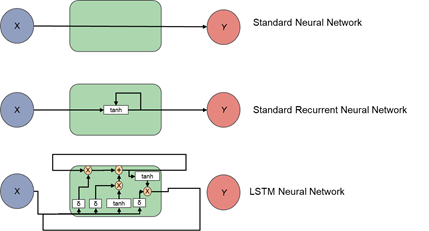

In [226]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

## Shape de RNN

Las redes neuronales no trabajan como lo hacen los demas modelos, ya que su inputdebe ser un **TENSOR**, y como sabemos los Tensores son de mas de dos dimensiones. 

Para este caso nuestras matrices de Train, Test y Validacion deberan ser de 3 dimensiones.

In [122]:
# reshape para x_train y x_test
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [123]:
X_validacion_red = np.reshape(X_validacion, (X_validacion.shape[0],1,X_validacion.shape[1]))

In [124]:
X_train.shape

(181, 1, 16)

In [125]:
X_test.shape

(12, 1, 16)

In [126]:
X_validacion_red.shape

(12, 1, 16)

Se validaron los shape para cada una de las matrices.

## RED NEURONAL

Se diseño una red neuronal de 3 capas, que esat compuesta de la siguiente manera:

- 1 capa de entrada (input).
- 1 capa oculta (hidden).
- 1 capa de salida (output).

## Capa INPUT

- units = Numero de neuronas que contiene la capa. Esta capa posee 16 neurona ya que la matriz que posee los datos tiene 16 columnas.

- input_sahpe: es la forma en que seran ingresados los datos a la dicha capa, es decir, la capa recibira 1 fila con 16 columnas (1,16).

- activation: Es la funcion de activacion para esta capa, la cual sera lineal, ya que es la que mejor se ajusta a la forma de nuestros datos y estamos tratanfo ante un problema de regresion.

## Capa Hidden

Como la capa anterior (input) posee 16 neuronas y una funcion de activacion lineal. El valor de las neuronas de esta viene dado por el valor de:
```
h = m * n
```
donde,

- h: # de neuronas de la capa oculta.
- m: # de neuornas que tendra la capa de salida (output).
- n: # de neuronas que posee la de entrada (input).


## Capa de Salida (output)

Nuestra capa de salida posee una sola neurona, esto debido a que la cantidad de valores que buscamos predecir es uno solo.

In [227]:
model = Sequential()
# layer 1: LSTM
model.add(LSTM(units=16, input_shape= (1,16), activation='linear'))
# layer 2: dense
model.add(Dense( units= 16,activation='linear'))
# layer 3: dense
#model.add(Dense( units=16,activation='linear'))
# layer 4 : outpout
model.add(Dense(units=1, activation='linear'))
# compile the model
model.compile(loss="mse", optimizer="rmsprop")

In [228]:
#Entrenamiento del modelo
model.fit(X_train, y_train, batch_size=2, epochs=10, validation_data=(X_test,y_test))

Epoch 1/10
91/91 [==============================] - 2s 5ms/step - loss: 7732361728.0000 - val_loss: 880672256.0000
Epoch 2/10
91/91 [==============================] - 0s 3ms/step - loss: 586675264.0000 - val_loss: 434593024.0000
Epoch 3/10
91/91 [==============================] - 0s 3ms/step - loss: 539423872.0000 - val_loss: 501062656.0000
Epoch 4/10
91/91 [==============================] - 0s 3ms/step - loss: 586920256.0000 - val_loss: 481394464.0000
Epoch 5/10
91/91 [==============================] - 0s 3ms/step - loss: 499715200.0000 - val_loss: 729799360.0000
Epoch 6/10
91/91 [==============================] - 0s 3ms/step - loss: 544116288.0000 - val_loss: 715778752.0000
Epoch 7/10
91/91 [==============================] - 0s 3ms/step - loss: 517973408.0000 - val_loss: 578287552.0000
Epoch 8/10
91/91 [==============================] - 0s 3ms/step - loss: 467464608.0000 - val_loss: 469227488.0000
Epoch 9/10
91/91 [==============================] - 0s 3ms/step - loss: 533942336.0000 

In [129]:
print("RMSE Train: ", np.sqrt(471465184))

RMSE Train:  21713.24904292308


In [130]:
print("RMSE Test: ", np.sqrt(393595904.0000))

RMSE Test:  19839.25159878769


Grafica de la funcion de perdida

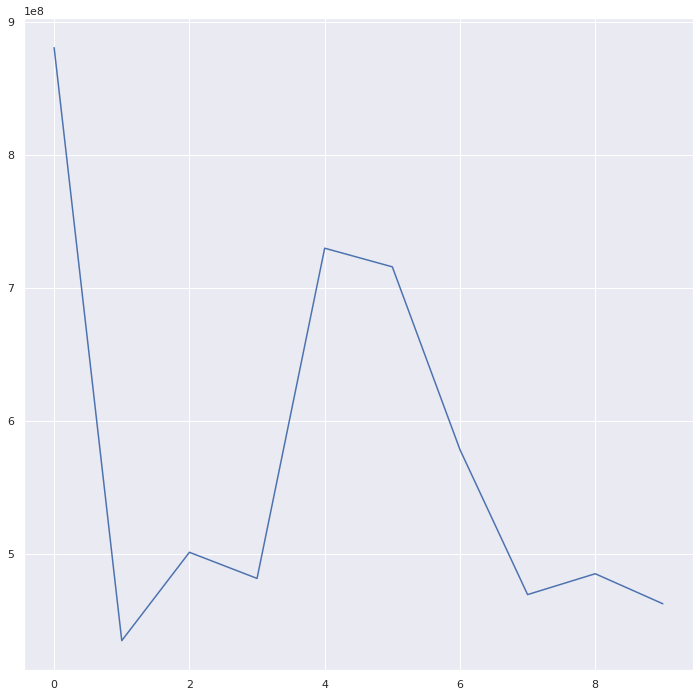

In [229]:
plt.plot(model.history.history['val_loss'])

## Prediccion para los datos de Validacion

In [230]:
pred_red_n = model.predict(X_validacion_red, use_multiprocessing=True)
pred_red_n


array([[259549.55],
       [254162.75],
       [252101.03],
       [229881.31],
       [247882.75],
       [241932.03],
       [237670.72],
       [243800.23],
       [229971.19],
       [235244.39],
       [263415.  ],
       [237011.19]], dtype=float32)

In [231]:
print("RMSE Validacion: ", np.sqrt( mean_squared_error(y_validacion, pred_red_n)))

RMSE Validacion:  43421.481992529356


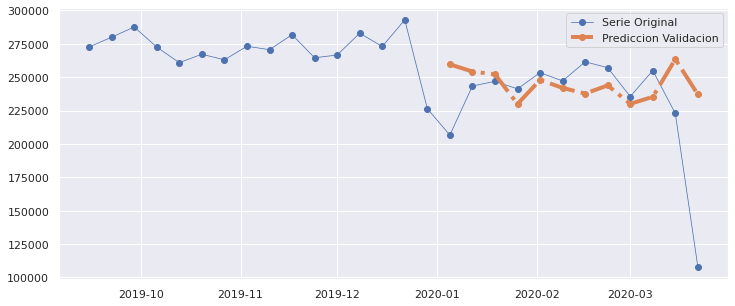

In [232]:
plt.figure(figsize=(12,5))
plt.plot(grafica_2019_2020.index, grafica_2019_2020.cantidad_pasos,lw = 0.75,marker='o', label = 'Serie Original')
plt.plot(grafica_2019_2020.iloc[-12:,:].index, pred_red_n,'-.', lw = 4, marker='o',label = 'Prediccion Validacion')
plt.legend()
plt.show()

# Conclusiones Red Neuronal LSTM

- Este modelo se ha comportado mejor para los datos de test y validacion mejor que cualquiera de los modelos del proyecto anterior

- Red Neuronal de 3 capas: 1 de entrada + 1 oculta + 1 de salida.

- Valor de RMSE:
  - Train = 21713
  - Test = 19839.25159878769
  - Validacion = 43804.804316368

Nota: los valores de train y test fueron tomados de lo arrojado por el modelo en cada epoch (se tomo el ultimo valor), donde loss: 471465184.0000 es el valor MSE para train y  val_loss: 393595904.0000 es el valor MSE para test y leugo a dichos valor les aplique np.sqrt (raiz cuadrada)



---



---



# Prophet

Es un modelo creado por Facebook, y diseñado especialmente para Series de Tiempo.

Donde la forma para ingresar los datos es particular, ya que este modelo pide renombrar las columnas para poder realizar el entrenamiento y la prediccion.

- **ds**: para la columna que contiene las fechas.
- **y**: para la columna que posee los valores a predecir.

In [135]:
from fbprophet import Prophet
pht = Prophet()

In [136]:
df_prophet = semanal.copy()

In [137]:
df_prophet

,fecha,cantidad_pasos
1,2016-01-10,342201.0
2,2016-01-17,359649.0
3,2016-01-24,346217.0
4,2016-01-31,348221.0
5,2016-02-07,364271.0
...,...,...
205,2019-12-08,282891.0
206,2019-12-15,272960.0
207,2019-12-22,292881.0
208,2019-12-29,226390.0


In [138]:
df_prophet.drop(labels=[209], inplace=True)
df_prophet

,fecha,cantidad_pasos
1,2016-01-10,342201.0
2,2016-01-17,359649.0
3,2016-01-24,346217.0
4,2016-01-31,348221.0
5,2016-02-07,364271.0
...,...,...
204,2019-12-01,266555.0
205,2019-12-08,282891.0
206,2019-12-15,272960.0
207,2019-12-22,292881.0


In [139]:
df_prophet[['ds','y']] = df_prophet[['fecha','cantidad_pasos']]
df_prophet.drop(columns=['fecha','cantidad_pasos'], inplace=True)

In [140]:
df_prophet.head()

,ds,y
1,2016-01-10,342201.0
2,2016-01-17,359649.0
3,2016-01-24,346217.0
4,2016-01-31,348221.0
5,2016-02-07,364271.0


**La cantidad de datos de entrenamiento son 144 semanas y las de test 12 semanas, para un total de 156:**




In [141]:
df = df_prophet.loc[:df_prophet.shape[0]-12,:]

In [142]:
df.sort_values('ds', inplace= True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [143]:
df

,ds,y
1,2016-01-10,342201.0
2,2016-01-17,359649.0
3,2016-01-24,346217.0
4,2016-01-31,348221.0
5,2016-02-07,364271.0
...,...,...
192,2019-09-08,276271.0
193,2019-09-15,272592.0
194,2019-09-22,279927.0
195,2019-09-29,287568.0


In [144]:
df.shape

(196, 2)

##**Entrenamos el modelo:**

In [145]:
model = pht.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Future

Con la funcion "make_future" creamos los periodos que se van a predecir, es decir, la cantiad de valores que queremos predecir y la frecuencia de dichos valores. Y con la propiedad "periods" pasamos la cantidad de datos que deseamos predecir y con la propiedad "freq" le decimos la fecuencia, ya sea diaria, semanal, mensual o anual, etc.

Para este modelo vamos a predecir 24 semanas ya que comprenden las 12 semanas para los datos de test y las 12 de los datos de validacion.

In [146]:
future = model.make_future_dataframe(periods=24,freq='W')

In [147]:
future

,ds
0,2016-01-10
1,2016-01-17
2,2016-01-24
3,2016-01-31
4,2016-02-07
...,...
215,2020-02-23
216,2020-03-01
217,2020-03-08
218,2020-03-15


In [148]:
future.shape[0]

220

In [149]:
future[-12:]

,ds
208,2020-01-05
209,2020-01-12
210,2020-01-19
211,2020-01-26
212,2020-02-02
213,2020-02-09
214,2020-02-16
215,2020-02-23
216,2020-03-01
217,2020-03-08


In [150]:
grafica_2019_2020.cantidad_pasos[-12:]

fecha
2020-01-05    206593.0
2020-01-12    243359.0
2020-01-19    246818.0
2020-01-26    241192.0
2020-02-02    253335.0
2020-02-09    247145.0
2020-02-16    261458.0
2020-02-23    257096.0
2020-03-01    235487.0
2020-03-08    254910.0
2020-03-15    222793.0
2020-03-22    107855.0
Freq: W-SUN, Name: cantidad_pasos, dtype: float64

## **PREDICCIÓN**



In [151]:
y_new_pred = model.predict(future)

Vemos las predicciones de forma grafica. Donde los puntos negros son los datos reales, la linea azul es el valor predicho y la parte sombreada comprende el intervalo entre lo minimo predicho y lo maximo, ya que el modelo tambien nos da esos valores.



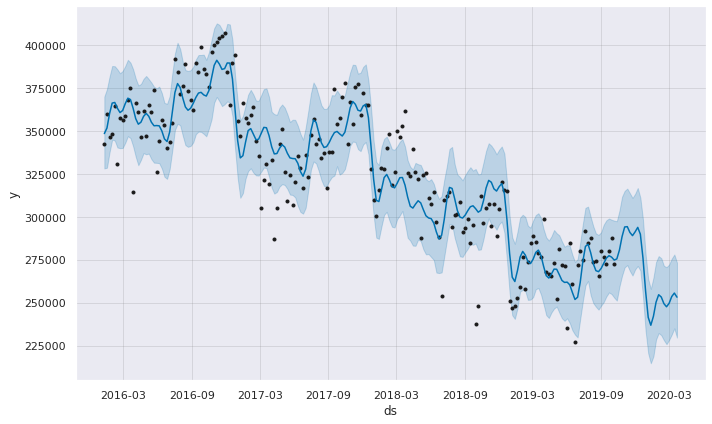

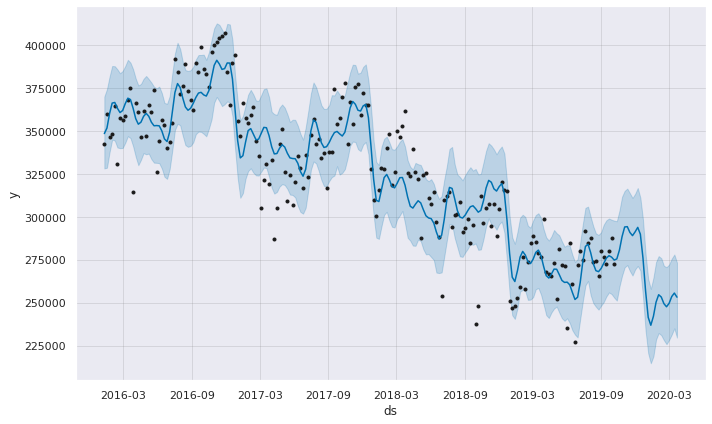

In [152]:
model.plot(y_new_pred)

## matriz de que arroja el modelo luego de predecir

- ds: Fecha
- yhat: Valor predicho
- yhat_lower: valor minimo predicho
- yhay_upper: valor maximo predicho

In [153]:
y_new_pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-10,371948.583271,328110.114157,369943.126614,371948.583271,371948.583271,-23535.006261,-23535.006261,-23535.006261,-23535.006261,-23535.006261,-23535.006261,0.0,0.0,0.0,348413.577010
1,2016-01-17,371708.659414,328526.428030,374287.689589,371708.659414,371708.659414,-20098.607933,-20098.607933,-20098.607933,-20098.607933,-20098.607933,-20098.607933,0.0,0.0,0.0,351610.051481
2,2016-01-24,371468.735557,337569.045855,381558.342640,371468.735557,371468.735557,-11453.784318,-11453.784318,-11453.784318,-11453.784318,-11453.784318,-11453.784318,0.0,0.0,0.0,360014.951239
3,2016-01-31,371228.811700,344900.962033,387743.878647,371228.811700,371228.811700,-5077.527921,-5077.527921,-5077.527921,-5077.527921,-5077.527921,-5077.527921,0.0,0.0,0.0,366151.283779
4,2016-02-07,370988.887843,344324.452735,387611.631666,370988.887843,370988.887843,-4471.808134,-4471.808134,-4471.808134,-4471.808134,-4471.808134,-4471.808134,0.0,0.0,0.0,366517.079709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,2020-02-23,257459.811421,225818.154394,270624.312346,256016.242061,258971.778162,-9880.387211,-9880.387211,-9880.387211,-9880.387211,-9880.387211,-9880.387211,0.0,0.0,0.0,247579.424210
216,2020-03-01,256979.238186,228281.794741,272152.925294,255442.042618,258605.843430,-7383.479135,-7383.479135,-7383.479135,-7383.479135,-7383.479135,-7383.479135,0.0,0.0,0.0,249595.759051
217,2020-03-08,256498.664951,231408.094721,275595.970347,254872.155011,258222.247928,-2970.149075,-2970.149075,-2970.149075,-2970.149075,-2970.149075,-2970.149075,0.0,0.0,0.0,253528.515876
218,2020-03-15,256018.091716,235051.070721,277994.260792,254270.626047,257933.840665,-458.756387,-458.756387,-458.756387,-458.756387,-458.756387,-458.756387,0.0,0.0,0.0,255559.335328


## Separar valores de train, test y validacion
De la prediccion vamos a separar los valores de train, test y validacion.

In [154]:
datos_validacion= future[-12:]

In [155]:
grafica_2019_2020["cantidad_pasos"][-12:]

fecha
2020-01-05    206593.0
2020-01-12    243359.0
2020-01-19    246818.0
2020-01-26    241192.0
2020-02-02    253335.0
2020-02-09    247145.0
2020-02-16    261458.0
2020-02-23    257096.0
2020-03-01    235487.0
2020-03-08    254910.0
2020-03-15    222793.0
2020-03-22    107855.0
Freq: W-SUN, Name: cantidad_pasos, dtype: float64

In [156]:
datos_validacion["cantidad_pasos"]= grafica_2019_2020.cantidad_pasos.values[-12:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [157]:
datos_validacion["prediccion"] = y_new_pred.yhat.values[-12:]
datos_validacion

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,cantidad_pasos,prediccion
208,2020-01-05,206593.0,241420.866206
209,2020-01-12,243359.0,236825.333860
210,2020-01-19,246818.0,242054.678281
211,2020-01-26,241192.0,250243.868883
212,2020-02-02,253335.0,254588.522013
213,2020-02-09,247145.0,253244.389976
214,2020-02-16,261458.0,249413.292850
215,2020-02-23,257096.0,247579.424210
216,2020-03-01,235487.0,249595.759051
217,2020-03-08,254910.0,253528.515876


#Y_test

##Ultimo trimestre 2019

In [158]:
semanal_2019_2020

,cantidad_pasos
fecha,
2019-01-06,224395.0
2019-01-13,248077.0
2019-01-20,252617.0
2019-01-27,259019.0
2019-02-03,276568.0
...,...
2020-12-06,68580.0
2020-12-13,65435.0
2020-12-20,73578.0


In [159]:
start_date = '2019-09-01'
end_date = '2020-01-01'

ultimo_t_2019= semanal_2019_2020[
  (semanal_2019_2020.index >= start_date) & 
  (semanal_2019_2020.index <= end_date)
]
ultimo_t_2019= ultimo_t_2019[-12:]
ultimo_t_2019

,cantidad_pasos
fecha,
2019-10-13,260840.0
2019-10-20,267147.0
2019-10-27,262950.0
2019-11-03,273129.0
2019-11-10,270536.0
2019-11-17,281790.0
2019-11-24,264500.0
2019-12-01,266555.0
2019-12-08,282891.0


In [160]:
ultimo_t_2019.shape

(12, 1)

##Predicho por prophet par test

In [161]:
var = y_new_pred[(y_new_pred.ds >= start_date) & (y_new_pred.ds <= end_date)]
var

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
190,2019-09-01,269474.142297,248227.237179,290971.612396,269474.142297,269474.142297,416.510520,416.510520,416.510520,416.510520,416.510520,416.510520,0.0,0.0,0.0,269890.652817
191,2019-09-08,268993.569062,250347.243160,295372.928620,268993.569062,268993.569062,3943.053180,3943.053180,3943.053180,3943.053180,3943.053180,3943.053180,0.0,0.0,0.0,272936.622242
192,2019-09-15,268512.995827,253607.326284,297883.497547,268512.995827,268512.995827,7381.792606,7381.792606,7381.792606,7381.792606,7381.792606,7381.792606,0.0,0.0,0.0,275894.788433
193,2019-09-22,268032.422592,255920.804053,298981.105406,268032.422592,268032.422592,9293.692501,9293.692501,9293.692501,9293.692501,9293.692501,9293.692501,0.0,0.0,0.0,277326.115093
194,2019-09-29,267551.849357,254983.427416,298243.315911,267551.849357,267551.849357,8927.074135,8927.074135,8927.074135,8927.074135,8927.074135,8927.074135,0.0,0.0,0.0,276478.923491
195,2019-10-06,267071.276122,252909.796992,297708.331262,267071.276122,267071.276122,7695.410860,7695.410860,7695.410860,7695.410860,7695.410860,7695.410860,0.0,0.0,0.0,274766.686981
196,2019-10-13,266590.702887,251175.762454,297386.960946,266590.702887,266590.702887,8847.805549,8847.805549,8847.805549,8847.805549,8847.805549,8847.805549,0.0,0.0,0.0,275438.508436
197,2019-10-20,266110.129652,259352.105897,303546.845635,266106.874945,266117.033383,14494.936305,14494.936305,14494.936305,14494.936305,14494.936305,14494.936305,0.0,0.0,0.0,280605.065957
198,2019-10-27,265629.556416,265676.443242,311641.927456,265600.256444,265663.133809,22785.048700,22785.048700,22785.048700,22785.048700,22785.048700,22785.048700,0.0,0.0,0.0,288414.605116
199,2019-11-03,265148.983181,270546.286667,315049.326472,265078.778972,265219.989805,28883.159656,28883.159656,28883.159656,28883.159656,28883.159656,28883.159656,0.0,0.0,0.0,294032.142837


In [162]:
ultimo_t_2019["prediccion"] = var.yhat.values[-12:]
ultimo_t_2019

,cantidad_pasos,prediccion
fecha,,
2019-10-13,260840.0,275438.508436
2019-10-20,267147.0,280605.065957
2019-10-27,262950.0,288414.605116
2019-11-03,273129.0,294032.142837
2019-11-10,270536.0,294223.732342
2019-11-17,281790.0,290844.940748
2019-11-24,264500.0,288991.180723
2019-12-01,266555.0,291196.560348
2019-12-08,282891.0,293798.410761


In [163]:
ultimo_t_2019.reset_index(inplace=True)
ultimo_t_2019.rename(columns = {'fecha':'ds'}, inplace=True)
ultimo_t_2019

,ds,cantidad_pasos,prediccion
0,2019-10-13,260840.0,275438.508436
1,2019-10-20,267147.0,280605.065957
2,2019-10-27,262950.0,288414.605116
3,2019-11-03,273129.0,294032.142837
4,2019-11-10,270536.0,294223.732342
5,2019-11-17,281790.0,290844.940748
6,2019-11-24,264500.0,288991.180723
7,2019-12-01,266555.0,291196.560348
8,2019-12-08,282891.0,293798.410761
9,2019-12-15,272960.0,289818.179243


In [164]:
datos_train = df.copy()

In [165]:
datos_train

,ds,y
1,2016-01-10,342201.0
2,2016-01-17,359649.0
3,2016-01-24,346217.0
4,2016-01-31,348221.0
5,2016-02-07,364271.0
...,...,...
192,2019-09-08,276271.0
193,2019-09-15,272592.0
194,2019-09-22,279927.0
195,2019-09-29,287568.0


In [166]:
y_new_pred[(y_new_pred.ds < '2019-10-13')]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-10,371948.583271,328110.114157,369943.126614,371948.583271,371948.583271,-23535.006261,-23535.006261,-23535.006261,-23535.006261,-23535.006261,-23535.006261,0.0,0.0,0.0,348413.577010
1,2016-01-17,371708.659414,328526.428030,374287.689589,371708.659414,371708.659414,-20098.607933,-20098.607933,-20098.607933,-20098.607933,-20098.607933,-20098.607933,0.0,0.0,0.0,351610.051481
2,2016-01-24,371468.735557,337569.045855,381558.342640,371468.735557,371468.735557,-11453.784318,-11453.784318,-11453.784318,-11453.784318,-11453.784318,-11453.784318,0.0,0.0,0.0,360014.951239
3,2016-01-31,371228.811700,344900.962033,387743.878647,371228.811700,371228.811700,-5077.527921,-5077.527921,-5077.527921,-5077.527921,-5077.527921,-5077.527921,0.0,0.0,0.0,366151.283779
4,2016-02-07,370988.887843,344324.452735,387611.631666,370988.887843,370988.887843,-4471.808134,-4471.808134,-4471.808134,-4471.808134,-4471.808134,-4471.808134,0.0,0.0,0.0,366517.079709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,2019-09-08,268993.569062,250347.243160,295372.928620,268993.569062,268993.569062,3943.053180,3943.053180,3943.053180,3943.053180,3943.053180,3943.053180,0.0,0.0,0.0,272936.622242
192,2019-09-15,268512.995827,253607.326284,297883.497547,268512.995827,268512.995827,7381.792606,7381.792606,7381.792606,7381.792606,7381.792606,7381.792606,0.0,0.0,0.0,275894.788433
193,2019-09-22,268032.422592,255920.804053,298981.105406,268032.422592,268032.422592,9293.692501,9293.692501,9293.692501,9293.692501,9293.692501,9293.692501,0.0,0.0,0.0,277326.115093
194,2019-09-29,267551.849357,254983.427416,298243.315911,267551.849357,267551.849357,8927.074135,8927.074135,8927.074135,8927.074135,8927.074135,8927.074135,0.0,0.0,0.0,276478.923491


In [167]:
datos_train["prediccion"] = y_new_pred.yhat.values[(y_new_pred.ds < '2019-10-13')]


In [168]:
datos_train.rename(columns = {'y':'cantidad_pasos'}, inplace=True)
datos_train

,ds,cantidad_pasos,prediccion
1,2016-01-10,342201.0,348413.577010
2,2016-01-17,359649.0,351610.051481
3,2016-01-24,346217.0,360014.951239
4,2016-01-31,348221.0,366151.283779
5,2016-02-07,364271.0,366517.079709
...,...,...,...
192,2019-09-08,276271.0,272936.622242
193,2019-09-15,272592.0,275894.788433
194,2019-09-22,279927.0,277326.115093
195,2019-09-29,287568.0,276478.923491


#RMSE

In [169]:
RMSE_prophet_train = np.sqrt(mean_squared_error(datos_train.cantidad_pasos,datos_train.prediccion))
print('Error en Train para el prophet:',RMSE_prophet_train)

Error en Train para el prophet: 17197.395325112928


In [170]:
RMSE_prophet_test = np.sqrt(mean_squared_error(ultimo_t_2019.cantidad_pasos ,ultimo_t_2019.prediccion) )
print('Error en Test para el prophet:',RMSE_prophet_test)

Error en Test para el prophet: 20286.776473701


In [171]:
RMSE_prophet_val = np.sqrt(mean_squared_error(datos_validacion.cantidad_pasos ,datos_validacion.prediccion) )
print('Error en Validacion para el prophet:',RMSE_prophet_val)

Error en Validacion para el prophet: 44743.640363710816


#Concatenar en los años para graficar los datos reales

In [172]:
datos_validacion

,ds,cantidad_pasos,prediccion
208,2020-01-05,206593.0,241420.866206
209,2020-01-12,243359.0,236825.333860
210,2020-01-19,246818.0,242054.678281
211,2020-01-26,241192.0,250243.868883
212,2020-02-02,253335.0,254588.522013
213,2020-02-09,247145.0,253244.389976
214,2020-02-16,261458.0,249413.292850
215,2020-02-23,257096.0,247579.424210
216,2020-03-01,235487.0,249595.759051
217,2020-03-08,254910.0,253528.515876


In [173]:
datos_total = pd.concat([datos_train, ultimo_t_2019,datos_validacion])
datos_total

,ds,cantidad_pasos,prediccion
1,2016-01-10,342201.0,348413.577010
2,2016-01-17,359649.0,351610.051481
3,2016-01-24,346217.0,360014.951239
4,2016-01-31,348221.0,366151.283779
5,2016-02-07,364271.0,366517.079709
...,...,...,...
215,2020-02-23,257096.0,247579.424210
216,2020-03-01,235487.0,249595.759051
217,2020-03-08,254910.0,253528.515876
218,2020-03-15,222793.0,255559.335328


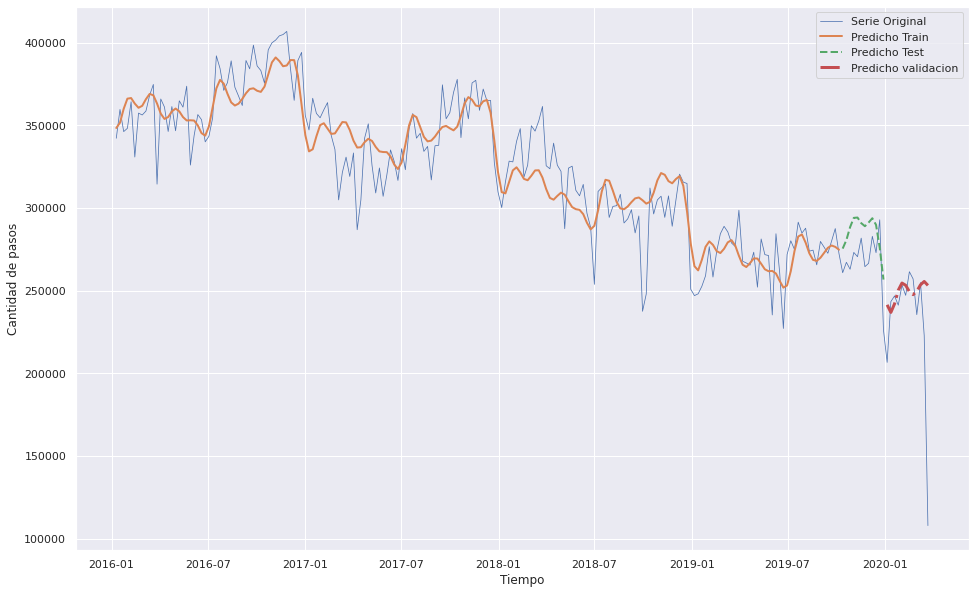

In [174]:
plt.figure(figsize=(16,10))
plt.plot(datos_total.ds, datos_total.cantidad_pasos,lw = 0.75, label = 'Serie Original')
plt.plot(datos_train.ds, datos_train.prediccion,lw = 2, label = 'Predicho Train')
plt.plot(ultimo_t_2019.ds,ultimo_t_2019.prediccion,'--',lw =2, label = 'Predicho Test')
plt.plot(datos_validacion.ds,datos_validacion.prediccion,'-.',lw=3,label = 'Predicho validacion')
#plt.fill_between(diario.ds, y_pred.yhat_lower, y_pred.yhat_upper)
#plt.plot(y_pred.ds,y_pred.yhat,'-.', lw = 4, label = 'Predicho en Test. Multi-Step')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.show()

# CONCLUSIONES DE PROPHET

-  Es un modelo muy facil de usar, desde que se tenga claro como se deben renombrar las columnas para el entrenamiento y como generar los valores futuros a predecir.

- Es un modelo que arroja una cantidad grande de informacion luego de predecir pero que para este caso solo usamos 2 columnas

  - **ds**: que en la fecha.
  - **yhat**: Que guarda el valor de la prediccion para dicha fecha

- Valor de metrica:
  - RMSE Train: 17197.395325112928
  - RMSE Test: 20286.776473701
  - RMSE Validacion: 44743.640363710816



---



---



#ARIMA

El modelo Arima, significa promedio móvil(MA) Integrado(I) autorregresivo(A), es un modelo estadístico que utiliza datos de series de tiempo para comprender mejor el conjunto de datos o para predecir tendencias futuras. Es una forma de análisis de regresión que mide la fuerza de una variable dependiente en relación a otra variable cambiante.

Para mayor claridad ARIMA es en realidad una clase de modelos que explica una serie de tiempo determinada, en función de sus propios valores pasados, es decir sus propios retrasos y los errores de pronóstico retrasados, de modo que se puede utilizar la ecuación para pronosticar valores futuros.

Ahora tengamos en cuenta que cualquier serie de tiempo "No estacional" que muestre patrones y no sea un "ruido blanco" aleatorio se puede modelar con modelos "ARIMA".

Un modelo ARIMA se caracteriza por tres términos:

- p es el orden del componente AR no estacional.
- q es el orden del componente MA (Media móvil) no estacional.
- d es el número de diferenciadores necesarias para que la serie de tiempo sea no estacionaria.

Si una serie de tiempo tiene patrones estacionales, entonces necesita agregar términos estacionales y se convierte en SARIMA, abreviatura de "Seasonal Arima"

Para que quede bien claro, los tres parámetros mencionado indican hasta donde se va a llegar con la serie.

- p significa cuántas semanas necesito para predecir la siguiente, por ejemplo si p=3, entonces el modelo va a mirar la semana 1,2 y 3 para calcular la siguiente semana.

- q es el parámetro de media móvil si p = 3 entonces el modelo va a calcular el promedio de las últimas 3 semanas y lo va a utilizar como un parámetro del modelo.

- d es el parámetro de integración, es el que permite que la serie se vuelva estacionaria o estable. La idea es que si tengo 0 o 1.

Recordemos lo siguiente: Una serie estacional es que tenga un patrón, una serie estacionaria es que tienda a ser horizontal, es decir que oscile en un valor promedio.

Algo que aprendí es que si tengo 156 datos no puedo tener muchos parámetros, porque el sistema revienta, haciendo un simil con las ecuaciones, no puede pasar que tenga más incógnitas que ecuaciones, la idea es tener menos incógnitas que ecuaciones, porque o sino tendría infinitas soluciones.

Tomado de:

https://www.youtube.com/watch?v=xbqY485yslI - Introducción a Modelo Arima con Phyton

Y de las explicaciones del profesor Eduardo Hurtado de Acámica.

A continuación realizaré los pasos necesarios para utilizar el modelo Arima en como mejora al proyecto tres, tal como lo mencioné anteriormente.

In [175]:
#import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [176]:
import itertools
import warnings
warnings.filterwarnings('ignore')


In [177]:
semanal_s = semanal.copy()
semanal_s.set_index('fecha', inplace=True)

In [178]:
y_s = semanal_s
y_s

,cantidad_pasos
fecha,
2016-01-10,342201.0
2016-01-17,359649.0
2016-01-24,346217.0
2016-01-31,348221.0
2016-02-07,364271.0
...,...
2019-12-08,282891.0
2019-12-15,272960.0
2019-12-22,292881.0


In [179]:
y_s.loc[y_s.cantidad_pasos < 200000] = np.nan

y_s = y_s.interpolate()

print('Shape: ', y_s.shape)

y_s

Shape:  (209, 1)


,cantidad_pasos
fecha,
2016-01-10,342201.0
2016-01-17,359649.0
2016-01-24,346217.0
2016-01-31,348221.0
2016-02-07,364271.0
...,...
2019-12-08,282891.0
2019-12-15,272960.0
2019-12-22,292881.0


In [180]:
y_s.isnull().sum()


cantidad_pasos    0
dtype: int64

# Sarimax

Previamente se volvio a crear los datos para y que es nuestra variable objetivo y teniendo encuenta que son los unicos datos que se agregan al modelo.

luego de ello debemos asignar valores a los valores caracteristicos del modelo, tales como d, p y q:

- d: Se le asigno un rango de 0-1 ya que son los valores para decir si hay estacionalidad en los datos o no.

- q: es la media movil, y se le asigno un rango de 1-2 ya que como vimos en los modelos del proyecto anterior, dicha medio movil seria simplemente por maximo las ultimas 2 semanas.

- p: es la cantidad de semanas que necesitan para predecir la siguiente semana, y como vimos en los modelos del proyecto anterior. Las semanas que mas impactan en la prediccion son las ultimas 5 semanas, pero como la 5 era muy poco, no la inclui.

y en seasonal asigne un valor de 16 debido a que en la autocorrelacion me dio que el valor era de 16 semanas.

In [181]:
# Utilizaré los siguientes parámetros de d,p y q, luego de haber realizado varias pruebas e investigaciones, pues con valores mayores en p y q, el sistema genera errores, esta discusión la tuvimos en clase con el profesro.
d=range(0,2) 
p=range(1,5)
q=range(1,3)


pdq=list(itertools.product (p,d,q)) # Combinatoria entre p,d y q
seasonal_pdq=[(x[0],x[1],x[2], 16)
              for x in list(itertools.product (p,d,q)) ]
print('Ejemplos de combinaciones de parametros para SARIMAX ....')
print('SARIMAX:{} x{}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX:{} x{}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX:{} x{}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX:{} x{}'.format(pdq[2],seasonal_pdq[4]))


Ejemplos de combinaciones de parametros para SARIMAX ....
SARIMAX:(1, 0, 2) x(1, 0, 2, 16)
SARIMAX:(1, 0, 2) x(1, 1, 1, 16)
SARIMAX:(1, 1, 1) x(1, 1, 2, 16)
SARIMAX:(1, 1, 1) x(2, 0, 1, 16)


In [182]:
"""
param_s =[]
param_sea=[]
r_sarimax=[]
for param in pdq:
     for param_seasonal in seasonal_pdq:
         #print('Hello 0')
         try:
             #print('Hello1')
             modelo=tsa.statespace.sarimax.SARIMAX(y,
                            order= param,
                            seasonal_order=param_seasonal,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
             print('mod',modelo)
             #print('Hello2')
             results = modelo.fit()
             #print('Hello3', results)
             print('SARIMAX{}x{} - AIC:{}'.format(param,param_seasonal, results.aic))
             param_s.append(param)
             param_sea.append(param_seasonal)
             r_sarimax.append(results.aic)
         except :
             print(1)
             continue
"""

"\nparam_s =[]\nparam_sea=[]\nr_sarimax=[]\nfor param in pdq:\n     for param_seasonal in seasonal_pdq:\n         #print('Hello 0')\n         try:\n             #print('Hello1')\n             modelo=tsa.statespace.sarimax.SARIMAX(y,\n                            order= param,\n                            seasonal_order=param_seasonal,\n                            enforce_stationarity=False,\n                            enforce_invertibility=False)\n             print('mod',modelo)\n             #print('Hello2')\n             results = modelo.fit()\n             #print('Hello3', results)\n             print('SARIMAX{}x{} - AIC:{}'.format(param,param_seasonal, results.aic))\n             param_s.append(param)\n             param_sea.append(param_seasonal)\n             r_sarimax.append(results.aic)\n         except :\n             print(1)\n             continue\n"

In [183]:
y_s = y_s[:"2019"]

In [184]:
y_s[:-12]

,cantidad_pasos
fecha,
2016-01-10,342201.0
2016-01-17,359649.0
2016-01-24,346217.0
2016-01-31,348221.0
2016-02-07,364271.0
...,...
2019-09-08,276271.0
2019-09-15,272592.0
2019-09-22,279927.0


In [185]:
"""
t_sarimax = {
    'Param': param_s,
    'Seasonal': param_seasonal,
     'AIC': results.aic
}
t_sarimax= pd.DataFrame(t_sarimax)
t_sarimax
"""

"\nt_sarimax = {\n    'Param': param_s,\n    'Seasonal': param_seasonal,\n     'AIC': results.aic\n}\nt_sarimax= pd.DataFrame(t_sarimax)\nt_sarimax\n"

#Mejor Modelo

Al correr el cdigo anterior (El cual duro 5 horas corriendo) obtuve un que los valores que mejor resultado me dieron para el modelo fueron: 

SARIMAX(4, 1, 1)x(4, 1, 2, 16) - AIC:2475.216492820951

In [186]:
modelo=tsa.statespace.sarimax.SARIMAX(y_s,
            order= (4, 1, 1),
            seasonal_order= (4, 1, 2, 16),
            enforce_stationarity=False,
            enforce_invertibility=False)
#print('mod',modelo)
#print('Hello2')
results = modelo.fit()
#print('Hello3', results)
print('SARIMAX{}x{} - AIC:{}'.format((4, 1, 1), (4, 1, 2, 16), results.aic))

SARIMAX(4, 1, 1)x(4, 1, 2, 16) - AIC:2815.1953268022185


In [187]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1560     25.519     -0.006      0.995     -50.171      49.859
ar.L2         -0.2027      8.909     -0.023      0.982     -17.664      17.258
ar.L3         -0.0917      6.874     -0.013      0.989     -13.565      13.382
ar.L4          0.0250      3.628      0.007      0.995      -7.087       7.137
ma.L1         -0.1916     25.487     -0.008      0.994     -50.145      49.762
ar.S.L16      -0.8647      2.204     -0.392      0.695      -5.184       3.455
ar.S.L32      -0.3974      0.774     -0.514      0.608      -1.914       1.119
ar.S.L48      -0.3467      0.480     -0.723      0.470      -1.287       0.594
ar.S.L64      -0.1783      0.406     -0.439      0.661      -0.974       0.617
ma.S.L16      -0.0610      2.250     -0.027      0.978      -4.471       4.349
ma.S.L32      -0.2656      1.374     -0.193      0.8

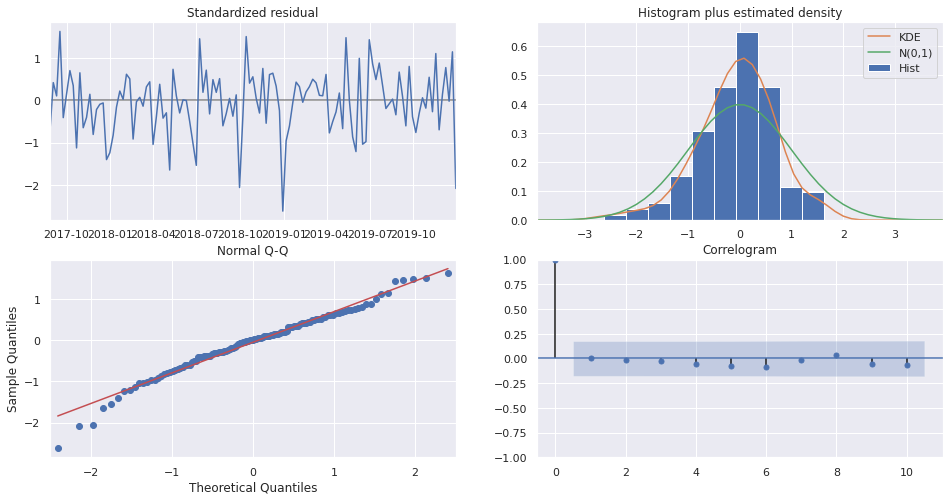

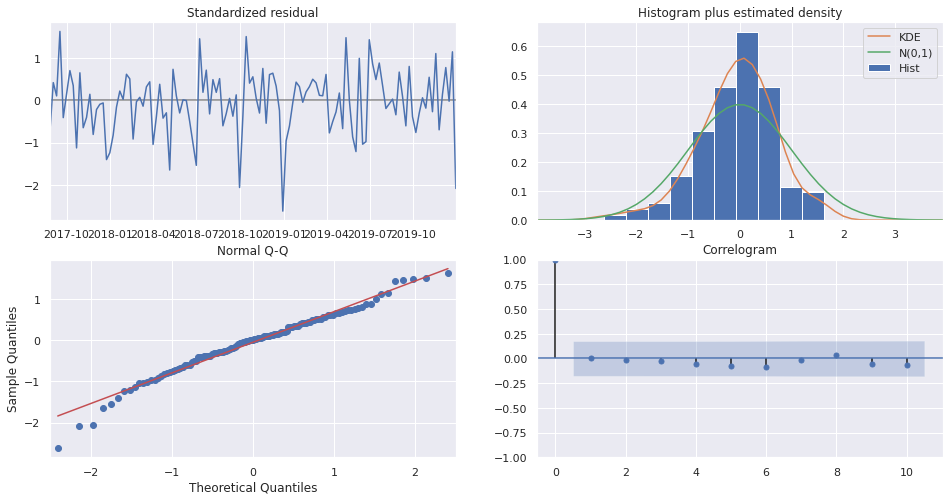

In [188]:
results.plot_diagnostics(figsize=(16, 8))

In [189]:
pred_test_sar=results.predict(start=datetime.datetime(2019,10,13))

In [190]:
pred_test_sar

2019-10-13    268720.816137
2019-10-20    265562.007844
2019-10-27    267642.747114
2019-11-03    259099.812093
2019-11-10    277393.073538
2019-11-17    253375.032889
2019-11-24    282350.058975
2019-12-01    262904.327482
2019-12-08    262983.555590
2019-12-15    273478.285342
2019-12-22    263427.584822
2019-12-29    279800.126236
Freq: W-SUN, dtype: float64

In [191]:
print("RMSE Test: ", np.sqrt(mean_squared_error( y_test, pred_test_sar)))

RMSE Test:  21722.97693263353


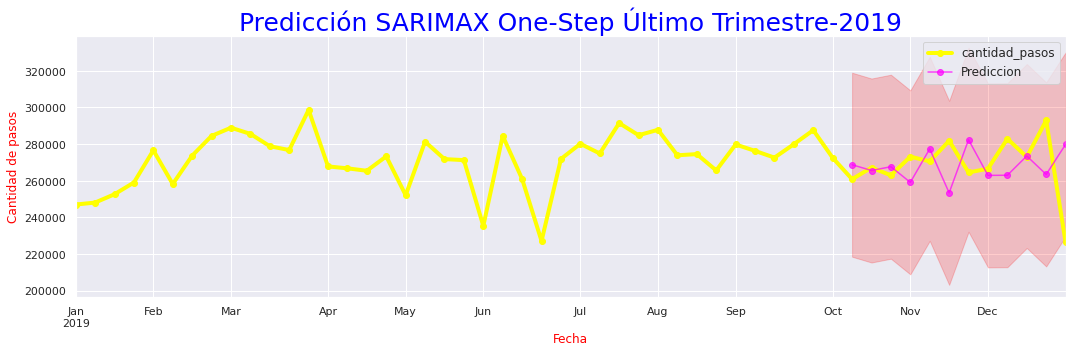

In [192]:
pred = results.get_prediction(start=datetime.datetime(2019,10,13), dynamic=False)
pred_ci = pred.conf_int()
ax = y_s['2019':].plot(label='Serie Observada',color='yellow',marker='o',lw = 4,figsize=(15,5))

pred.predicted_mean.plot(ax=ax, label='Prediccion', alpha=.7, color='magenta', marker='o')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='red', alpha=.2)
plt.title("Predicción SARIMAX One-Step Último Trimestre-2019", color= 'blue', fontsize=25)
ax.set_xlabel('Fecha',color='red')
ax.set_ylabel('Cantidad de pasos',color='red')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

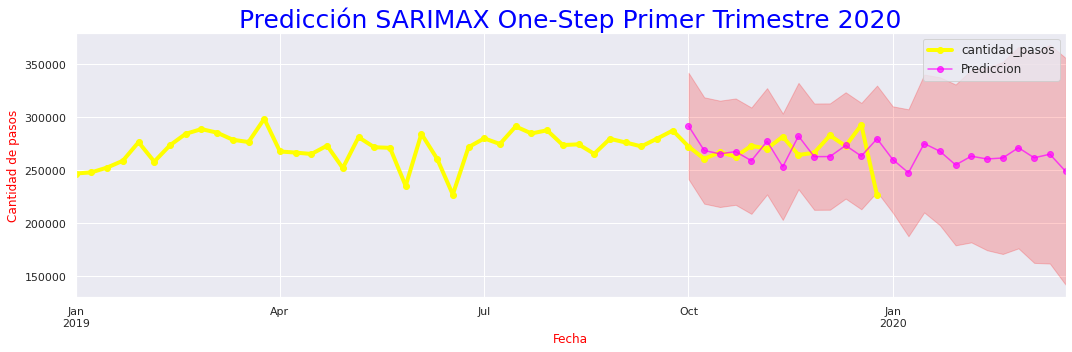

In [193]:
pred = results.get_prediction(start=datetime.datetime(2019,10,6), end=datetime.datetime(2020,3,22), dynamic=False)
pred_ci = pred.conf_int()
ax = y_s["2019":].plot(label='Serie Observada',color='yellow',marker='o',lw = 4,figsize=(15,5))

pred.predicted_mean.plot(ax=ax, label='Prediccion', alpha=.7, color='magenta', marker='o')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='red', alpha=.2)
plt.title("Predicción SARIMAX One-Step Primer Trimestre 2020", color= 'blue', fontsize=25)
ax.set_xlabel('Fecha',color='red')
ax.set_ylabel('Cantidad de pasos',color='red')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [194]:
pred_val_sar = pred_test_sar=results.predict(start=datetime.datetime(2020,1,5), end=datetime.datetime(2020,3,22))

In [195]:
pred_val_sar

2020-01-05    260191.840825
2020-01-12    247689.131972
2020-01-19    275302.014129
2020-01-26    268002.079402
2020-02-02    255111.192653
2020-02-09    263342.275959
2020-02-16    260710.258810
2020-02-23    261654.679171
2020-03-01    271342.097064
2020-03-08    261824.571205
2020-03-15    265200.387465
2020-03-22    249083.121766
Freq: W-SUN, dtype: float64

In [196]:
print("RMSE Validacionn: ", np.sqrt(mean_squared_error( y_validacion, pred_val_sar)))

RMSE Validacionn:  48119.4006701165


# CONCLUSIONES SARIMAX

- Es un modelo diseñado especialmente para series de tiempo.
- Permite una sola entrada de datos (la variable objetivo)
- es mas tardado para llegar a los valores optimos que los demas modelos.
- Metrica para modelo:
  
  - Test: 21722.97693263353
  - Validation: 48119.4006701165

# CONCLUSIONES MODELOS


In [197]:
t_modelos = {
    'Modelos': ['Benchmark','RandomForest','SVR', 'XGBoost', 'LSTM', 'PROPHET', 'SARIMAX'],
    'RMSE Train': [19842.39839695183, 10801.06801012566, 7604.728112448556, 1091.967702495397, 17197.395325112928,21713,np.nan],
    'RMSE Test': [22204.535604616158, 17955.426769196045, 22897.230521222744, 18436.499080933092,19839.25159878769,20286.776473701 ,21722.97693263353],
    'RMSE Validation': [np.nan, 56678.69452636382,np.nan,56986.801165980185,42986.138222743975,44743.640363710816 ,48119.4006701165]
}

t_modelos = pd.DataFrame(t_modelos)
t_modelos



,Modelos,RMSE Train,RMSE Test,RMSE Validation
0,Benchmark,19842.398397,22204.535605,NaN
1,RandomForest,10801.068010,17955.426769,56678.694526
2,SVR,7604.728112,22897.230521,NaN
3,XGBoost,1091.967702,18436.499081,56986.801166
4,LSTM,17197.395325,19839.251599,42986.138223
5,PROPHET,21713.000000,20286.776474,44743.640364
6,SARIMAX,NaN,21722.976933,48119.400670


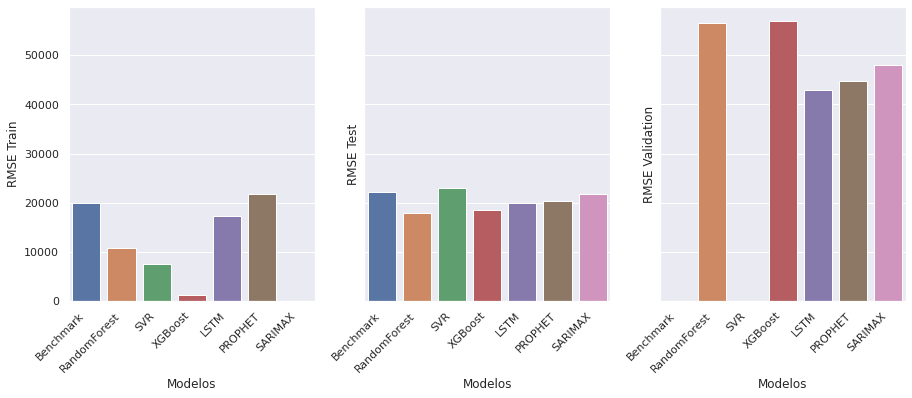

In [198]:
fig, axs = plt.subplots(1,3,figsize= (15,6), sharey= True,)
sns.barplot(data=t_modelos, x= 'Modelos', y='RMSE Train', ax= axs[0])
sns.barplot(data=t_modelos, x= 'Modelos', y='RMSE Test', ax= axs[1]);
sns.barplot(data=t_modelos, x= 'Modelos', y='RMSE Validation', ax= axs[2]);
fig.autofmt_xdate(rotation=45)



---



# MEJORES MODELOS

Lista de los mejores modelos para los datos de Validacion:

1.   Red Neuronal LSTM.
2.   Prophet.
3.   Sarimax.
4.   Xgboost.
5.   RandomForest.

* Inicialmente podemos ver como el modelo LSTM aunque no fue mejor que los modelos del proyecto anterior, para los datos de de train y test, en los datos de validacion si fue muy superior a ellos.

* Comprobamos que los modelos del proyecto anterior tienden a el SOBREAJUSTE, ay que para los dasto de train se comportan muy bien y para los datos de test y validacion no tanto.

* Los 3 modelos usados en este proyecto tienen una mayor resistencia ante el Sobreajuste. 






#CONCLUSIONES DEL PROYECTO

* Se aprendieron diferentes enfoques para un mismo problema, donde cada enfoque puede arrojar valores diferentes.

* Saber interpretar y conocer los modelores que mejor capturan el comportamientos de los datos a traves de la separacion de los datos en dataset de entrenamiento, testeo y validacion.

* Podemos ver como las series de tiempo pueden ser analizadas e ingresadas a nuestros modelos de una manera difente:
  * Como una unica columna de donde el index debe ser la fecha y la columna de datos los valores. Pero con esto tenemos que seguir la secuencia de datos, ya que como serie de tiempo el orden cronologico es indispensable.
  * Como una matriz de varias columnas, donde a traves del autocorrelograma, determinamos los valores anteriores que nos pueden ayudar a predecir y estos son organizados en columnas y tomando como variable objetivo el valor a predecir.